# <center>Análise de Campanha de Marketing
# <center>Subscrição de Depósito Bancário a Prazo

# <center>Previsão de Consumo de Combustível

 Legendas:
   * <code style="color:green">Teoria/Instruções</code>
   * <code style="color:purple">Comentários</code>
   * <code style="color:red">Dúvidas a serem esclarecidas</code>

# <center>IMPORTAÇÕES INICIAIS

## <center>Importando Bibliotecas

In [1]:
# Importando Bibliotecas

import pandas as pd                                                           # Biblioteca para manipulação e análise de dados
import numpy as np                                                            # Biblioteca para cálculos numéricos e operações com arrays
import matplotlib.pyplot as plt                                               # Biblioteca para criação de gráficos e visualizações
import matplotlib.ticker as mticker                                           # Biblioteca para formatação de eixos em gráficos
import plotly.express as px                                                   # Biblioteca para visualizações interativas
import seaborn as sns                                                         # Biblioteca para visualizações estatísticas avançadas

from tabulate import tabulate                                                 # Biblioteca para exibição formatada de tabelas no terminal

import missingno as msno                                                      # Biblioteca para visualização de valores ausentes
import os                                                                     # Biblioteca para interações com o sistema operacional
import sys                                                                   # Biblioteca para interações com o sistema, como manipulação de argumentos de linha de comando

from sklearn.linear_model import LinearRegression                             # Modelo de regressão linear do scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, roc_curve, auc, roc_auc_score, precision_recall_curve, recall_score, precision_score, f1_score, accuracy_score  # Métricas para avaliação de modelos de regressão
from sklearn.model_selection import train_test_split, cross_val_score         # Métodos para divisão de dados e validação cruzada
from sklearn.feature_selection import SequentialFeatureSelector               # Método de seleção sequencial de variáveis
from sklearn.feature_selection import RFE                                     # Método Recursive Feature Elimination para seleção de variáveis
from sklearn.ensemble import RandomForestRegressor                            # Modelo de regressão baseado em Floresta Aleatória
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import PowerTransformer                            # Função para a transformação boxcox
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import scipy.stats as stats                                                   # Biblioteca para estatísticas e testes estatísticos
from scipy.stats import shapiro                                               # Teste de normalidade de Shapiro-Wilk
from scipy.stats               import boxcox                                  # Transformação Box-Cox
from scipy.special             import inv_boxcox                              # Inversa da transformação Box-Cox
from scipy.stats import kstest                                                # Teste de Kolmogorov-Smirnov para comparação de distribuições

import pylab                                                                  # Biblioteca auxiliar para visualizações estatísticas, como QQ-plots

import inflection                                                             # Biblioteca para manipulação de strings, especialmente para conversão entre formatos de nomenclatura
from unidecode import unidecode                                               # Biblioteca para remover acentuação de strings

import statsmodels.formula.api as smf                                         # Biblioteca para modelagem estatística baseada em fórmulas
import statsmodels.api as sm                                                  # Biblioteca para análise estatística e econométrica
from statsmodels.stats.diagnostic import het_breuschpagan                     # Teste de heterocedasticidade de Breusch-Pagan
from statsmodels.stats.outliers_influence import variance_inflation_factor    # Cálculo do fator de inflação da variância (VIF) para detectar multicolinearidade
import statsmodels.stats.api as sms                                           # Biblioteca para estatísticas avançadas, incluindo testes de normalidade e heterocedasticidade

import statistics as st                                                      # Biblioteca para estatísticas descritivas e inferenciais
import math                                                                  # Biblioteca para funções matemáticas básicas

In [2]:
# Carregando funções auxiliares
import funcoes_importantes

# <center>DEFINIÇÃO DO PROBLEMA DE NEGÓCIO

Os dados bank.csv estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em chamadas telefônicas. Frequentemente, mais de um contato com o mesmo cliente era necessário para avaliar se o produto (depósito a prazo bancário) seria (ou não) subscrito.
Depósitos a prazo, em Portugal, são um tipo de investimento em que o cliente deposita uma certa quantia de dinheiro em uma conta bancária por um período específico, geralmente com juros mais elevados do que uma conta poupança.
A subscrição significa a ação de adquirir um produto financeiro, neste caso, um depósito a prazo.

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.


# <center>ENTENDIMENTO E AQUISIÇÃO DE DADOS

## <center>Importando dados

In [3]:
# Importando os dados do arquivo CSV
df_raw = pd.read_csv('bank.csv', sep=';')
# Exibindo as primeiras linhas do DataFrame
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## <center>Dicionário de Dados

| Variável          | Descrição                                                                                     | Unidade de Medida | Tipo               | Comentário                                                                 |
|-------------------|------------------------------------------------------------------------------------------------|-------------------|--------------------|----------------------------------------------------------------------------|
| age             | Idade do cliente                                                                              | anos              | inteiro            | -                                                                          |
| job          | Tipo de trabalho                                                                              | -                 | categórico         | Valores: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services |
| marital      | Estado civil                                                                                  | -                 | categórico         | Valores: married, divorced, single; "divorced" inclui viúvos              |
| education         | Nível de educação                                                                             | -                 | categórico         | Valores: unknown, secondary, primary, tertiary                            |
| default          | Indica se o cliente tem crédito em default                                                    | -                 | binário            | Valores: yes, no                                                           |
| balance            | Saldo médio anual                                                                              | euros             | inteiro           | -                                                                          |
| housing        | Indica se o cliente tem empréstimo habitacional                                               | -                 | binário            | Valores: yes, no                                                           |
| loan       | Indica se o cliente tem empréstimo pessoal                                                    | -                 | binário            | Valores: yes, no                                                           |
| contact          | Tipo de comunicação do último contato                                                         | -                 | categórico         | Valores: unknown, telephone, cellular                                      |
| day              | Último dia de contato do mês                                                                  | dia               | inteiro            | -                                                                          |
| month             | Último mês de contato do ano                                                                  | -                 | categórico         | Valores: jan, feb, mar, ..., nov, dec                                      |
| duration         | Duração do último contato                                                                     | segundos          | inteiro           | -                                                                          |
| campaign        | Número de contatos realizados durante esta campanha para este cliente                         | -                 | inteiro            | Inclui o último contato                                                    |
| pdays           | Dias desde o último contato em campanha anterior                                              | dias              | inteiro            | -1 = cliente não foi contatado anteriormente                               |
| previous        | Número de contatos realizados antes desta campanha para este cliente                          | -                 | inteiro            | -                                                                          |
| poutcome | Resultado da campanha de marketing anterior                                                  | -                 | categórico         | Valores: unknown, other, failure, success                                  |
| y                | Indica se o cliente subscreveu um depósito a prazo (variável alvo)                            | -                 | binário            | Valores: yes, no                                                           |

## <center>Análise Univariada - Dados Originais

<code style="color:green">Análise Univariada</code>


Antes de realizar qualquer modelagem, devemos sempre analisar nossas variáveis, em especial a variável dependente.

| **Análise**                          | **Função/Ferramenta**                     | **Instrução**                                                                 | **Exemplos**                                                    |
|--------------------------------------|------------------------------------------|----------------------------------------------------------------------------|---------------------------------------------------------------|
| **Tipos de variáveis**               | `df.head()`, `df.info()`, `df.describe()` | Identificar se as variáveis são contínuas, discretas ou categóricas.        | `Season_Sold` é categórica e precisa de codificação. Por que `Total_Bathroom` tem valores decimais? |
| **Valores ausentes**                 | `df.info()`                              | Verificar se há valores nulos e decidir estratégias de imputação.           | - |
| **Unidades de medidas**              | `df.describe()`                          | Avaliar se as unidades das variáveis estão coerentes e de fácil interpretação. | Algumas variáveis podem precisar de conversão de escala.      |
| **Média e Mediana**                  | `df.describe()`                          | Comparar média e mediana para identificar assimetria ou possíveis outliers. | Diferenças grandes indicam possível necessidade de transformação. |
| **Desvio padrão e CV**                    | `df.describe()`                          | Avaliar variabilidade dos dados.                                            | Se `std` for muito alto, pode indicar necessidade de normalização. |
| **Mínimo e Máximo**                  | `df.describe()`                          | Identificar valores inesperados, como negativos para variáveis que deveriam ser positivas. | Idade negativa sugere erro nos dados.                         |
| **Distribuição de variáveis**        | Histograma, Violino, `df.skew()`, `df.kurtosis()`  | Avaliar se segue uma distribuição normal.                                    | Se /Skewness/ > 1: Assimetria forte. Se 0.5 < /Skewness/ ≤ 1: Assimetria moderada.Se /Skewness/ ≤ 0.5: Praticamente simétrica. Se curtose perto de 0: normal. Curtose > 0: picos elevados, mais outliers. Curtose < 0: picos achatados, menos outliers. |
| **Outliers**                         | `sns.boxplot(x=df["Lot_Area"])` ou `zscore = stats.zscore(df["Lot_Area"])` | Detectar valores extremos que podem afetar o modelo.                        | - |
| **Escalas**                          | `df.describe()`                          | Comparar ordens de grandeza das variáveis. Se algumas forem muito maiores, normalização pode ser necessária. Log  | - |


Essa análise ajuda a evitar problemas como multicolinearidade, viés ou impacto de outliers no modelo.

In [4]:
# Exibindo principais informações do DataFrame
funcoes_importantes.data_description(df_raw)

******************** DATA DIMENSIONS ********************
Quantidade de linhas: 4,521
Quantidade de colunas: 17

******************** DATA TYPES *************************
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

******************** CHECK NAs **************************
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

******************** CHECK DUPLICATED *******************
Quantidade de registros duplicados: 0


In [5]:
# Criando uma cópia do dataframe apenas com variáveis numéricas
df_num = df_raw.select_dtypes(include=['int64', 'float64']).copy()
# Criando uma cópia do dataframe apenas com variáveis categóricas
df_cat = df_raw.select_dtypes(include=['object']).copy()

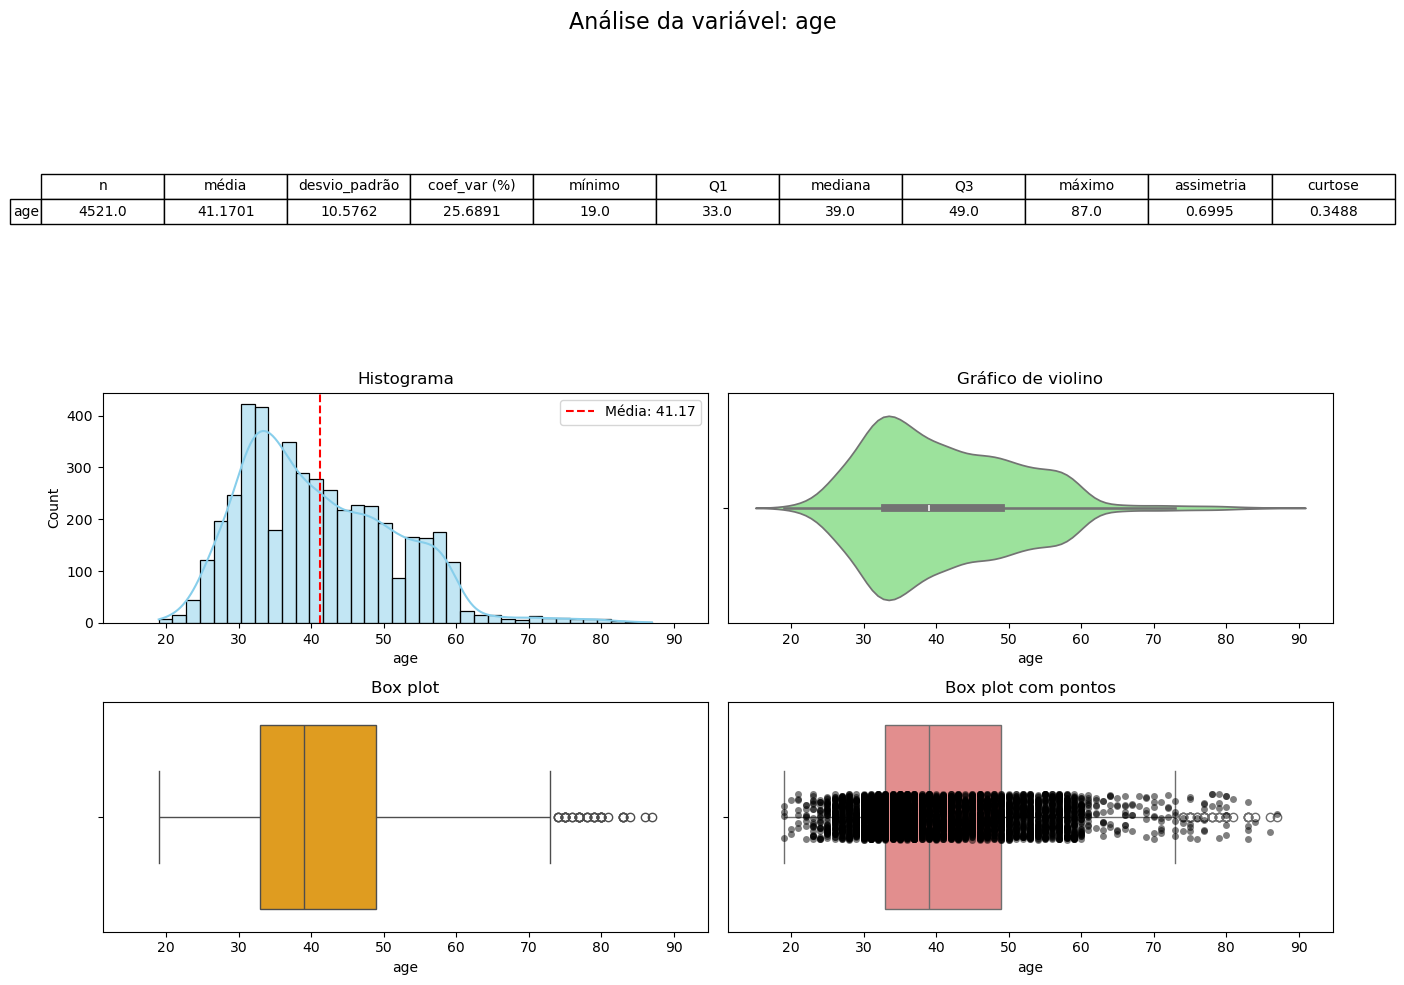

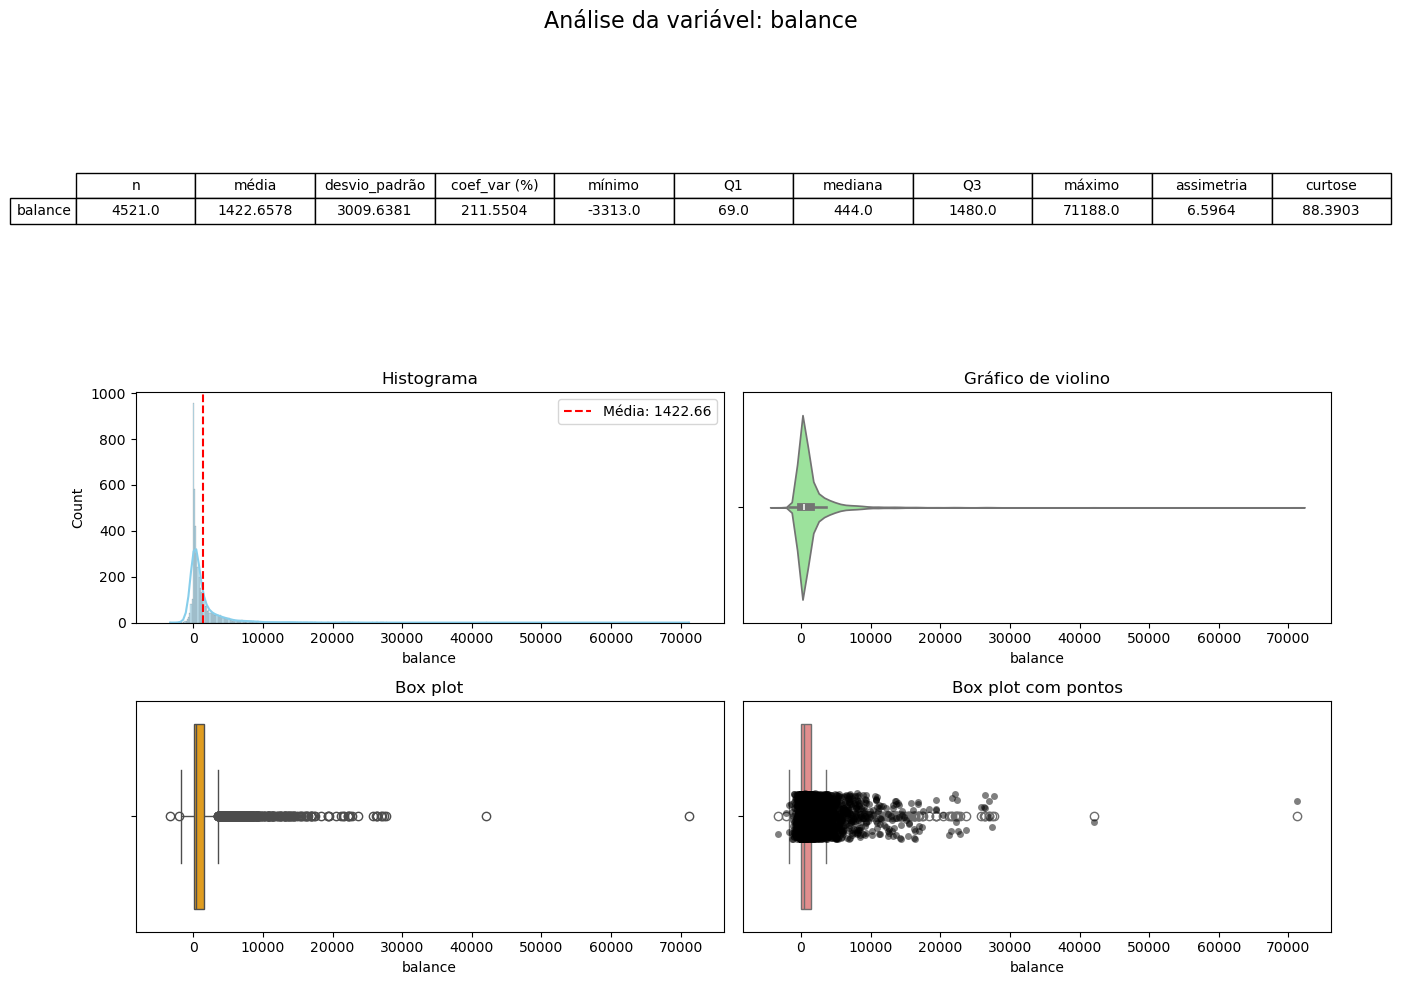

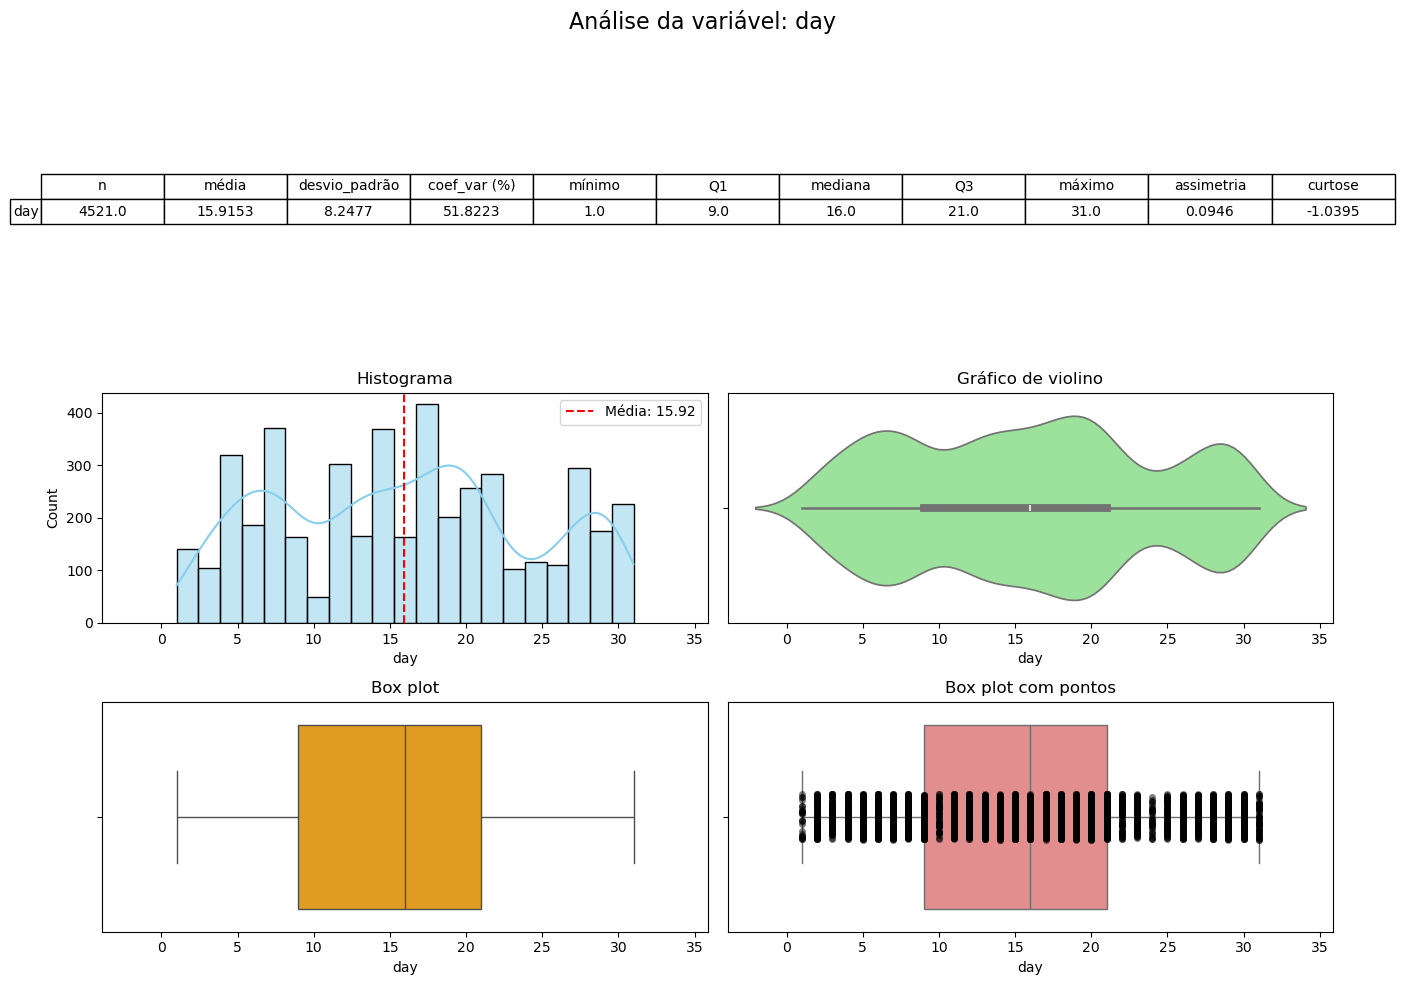

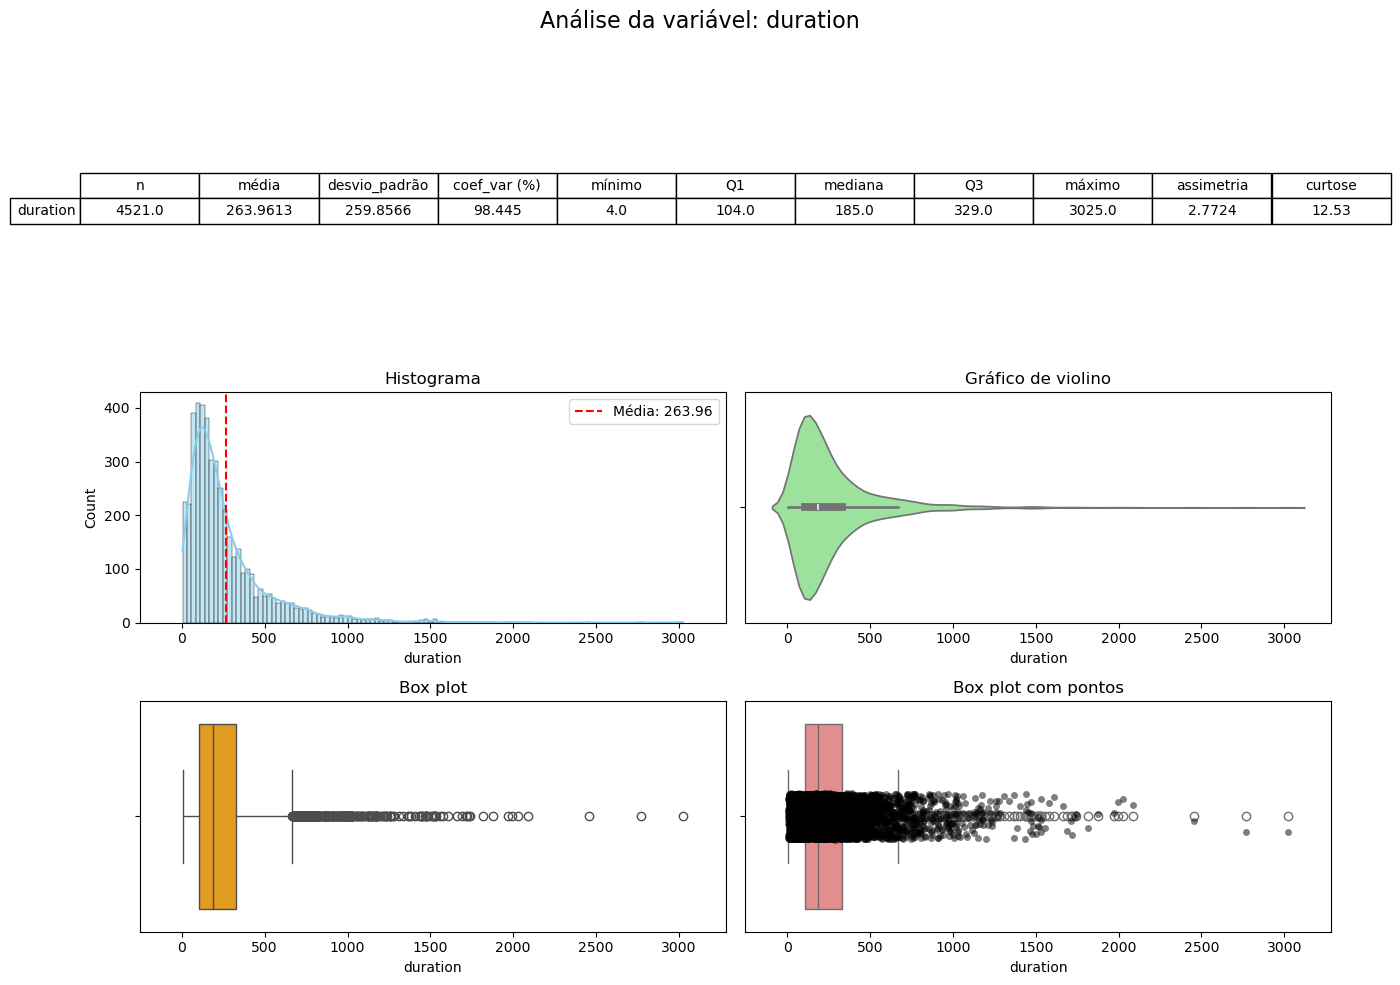

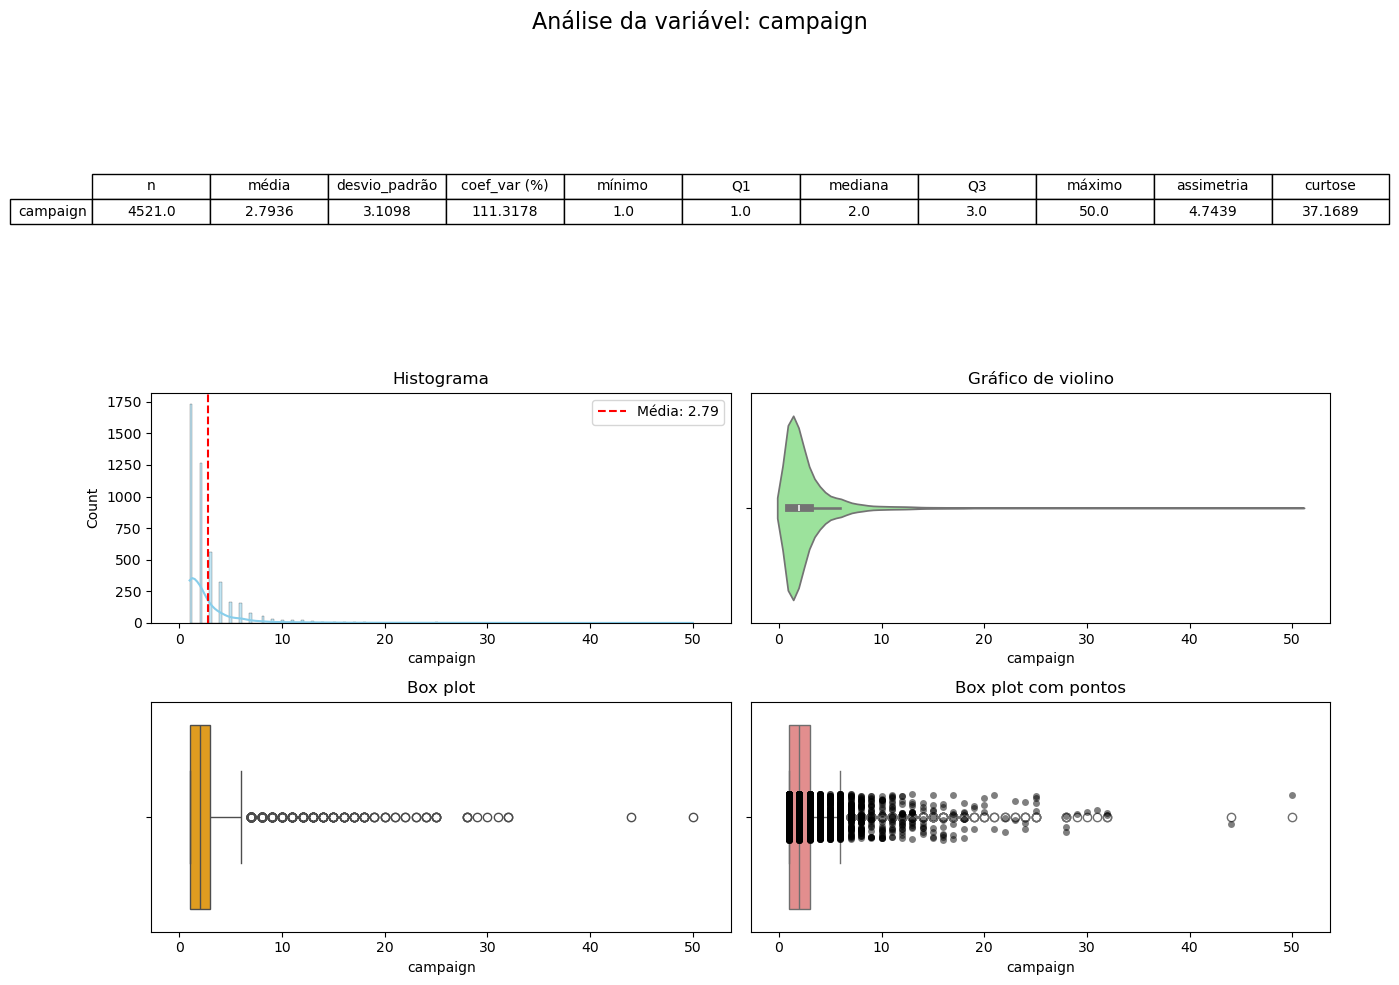

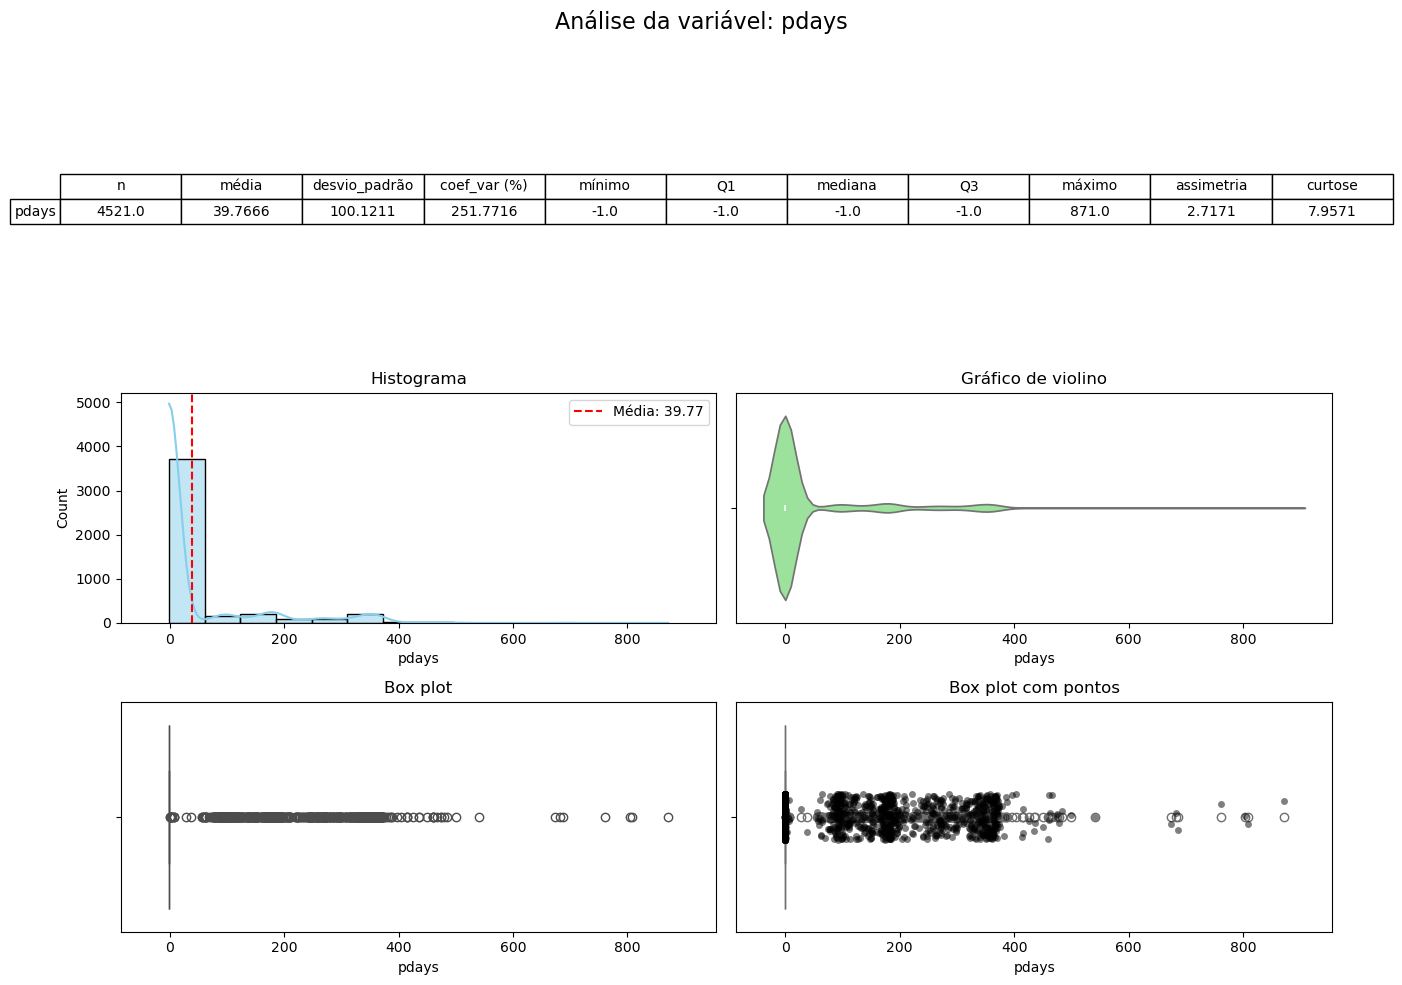

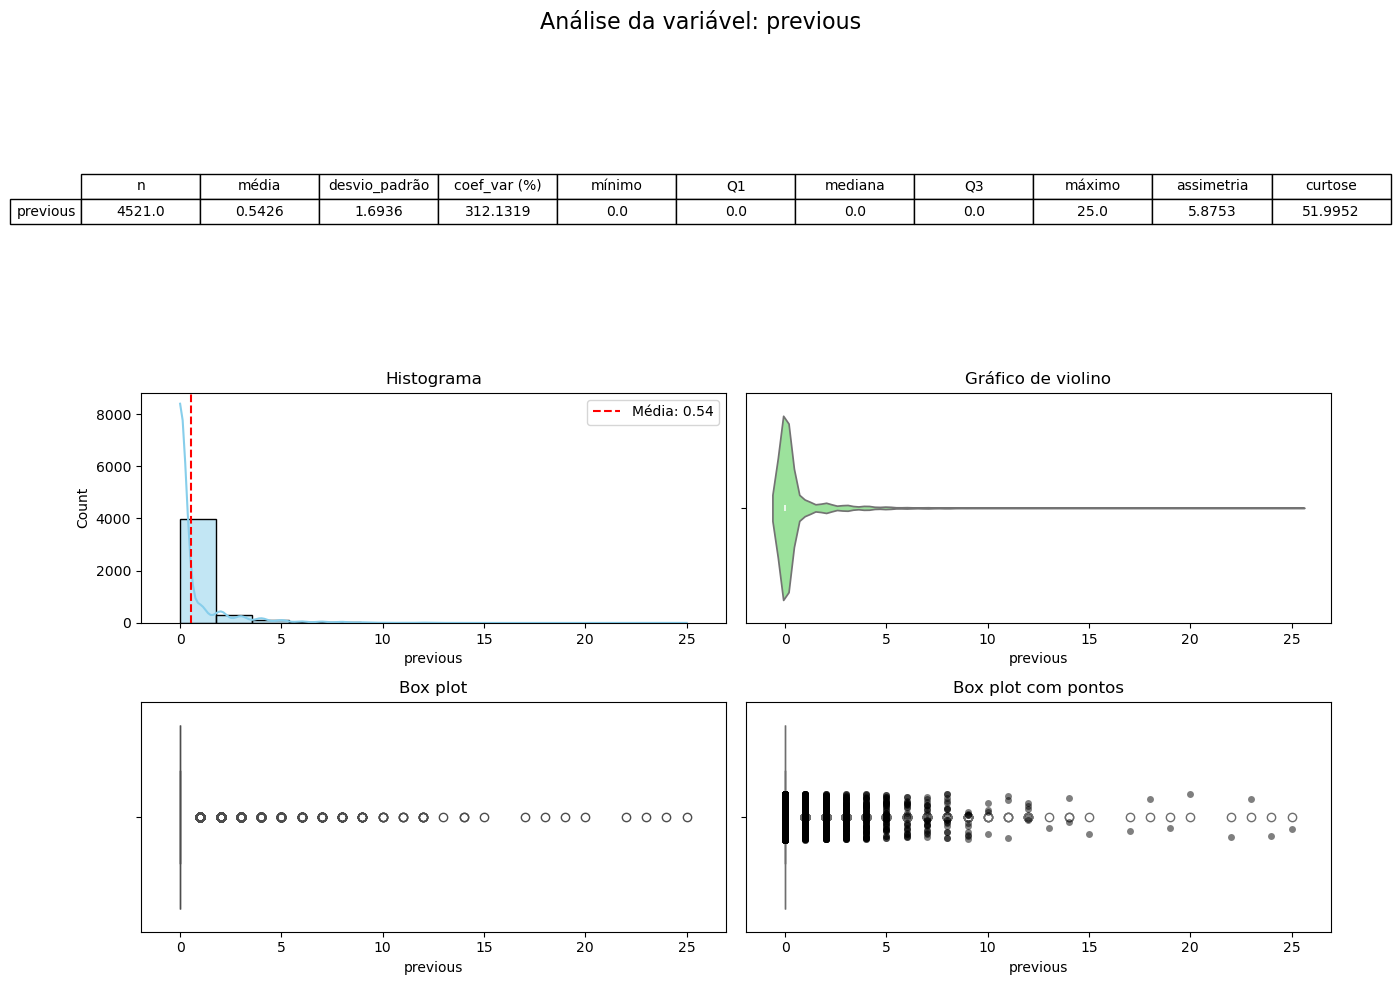

In [6]:
# Plotar gráficos de distribuição para variáveis numéricas
for coluna in df_num.columns:
    funcoes_importantes.univariada_variavel_numerica(df_num, coluna)

Describe da variável categórica:


,count,unique,top,freq
job,4521,12,management,969


Tabela de frequência da variável categórica (com percentuais e total):


,job,Frequência,Percentual (%)
0,management,969,21.43
1,blue-collar,946,20.92
2,technician,768,16.99
3,admin.,478,10.57
4,services,417,9.22
5,retired,230,5.09
6,self-employed,183,4.05
7,entrepreneur,168,3.72
8,unemployed,128,2.83
9,housemaid,112,2.48


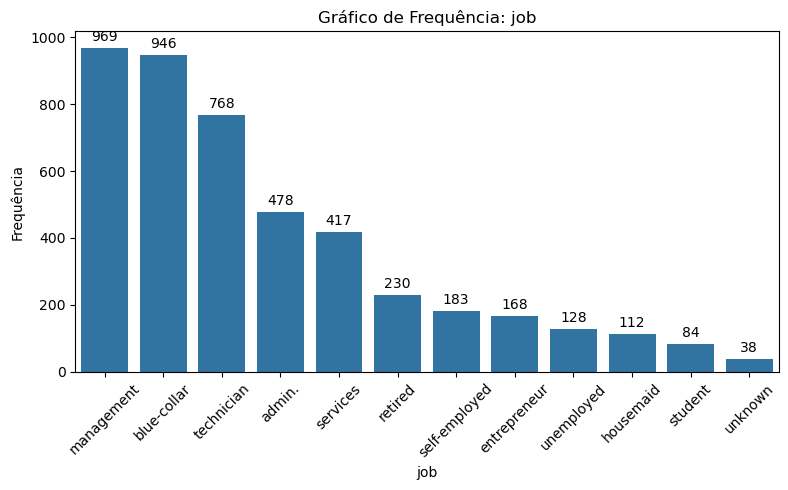

Describe da variável categórica:


,count,unique,top,freq
marital,4521,3,married,2797


Tabela de frequência da variável categórica (com percentuais e total):


,marital,Frequência,Percentual (%)
0,married,2797,61.87
1,single,1196,26.45
2,divorced,528,11.68
3,Total,4521,100.00


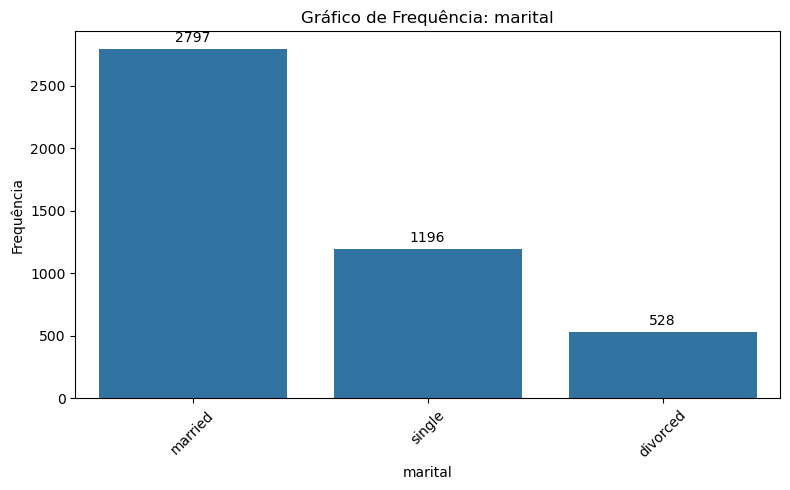

Describe da variável categórica:


,count,unique,top,freq
education,4521,4,secondary,2306


Tabela de frequência da variável categórica (com percentuais e total):


,education,Frequência,Percentual (%)
0,secondary,2306,51.01
1,tertiary,1350,29.86
2,primary,678,15.00
3,unknown,187,4.14
4,Total,4521,100.00


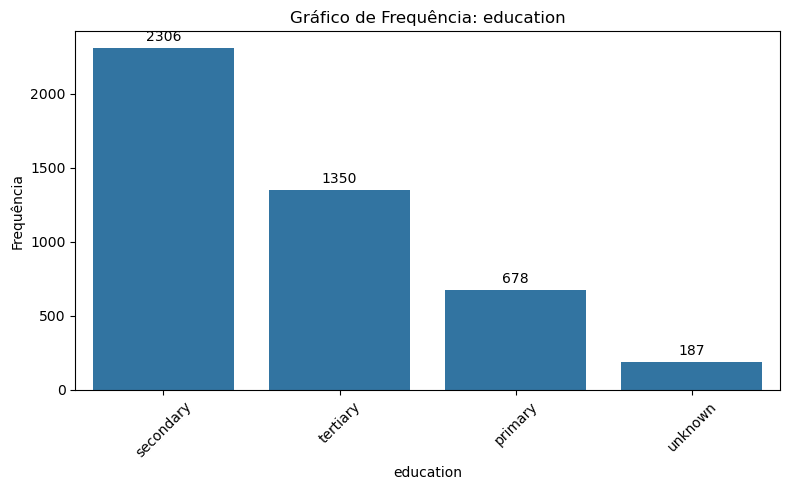

Describe da variável categórica:


,count,unique,top,freq
default,4521,2,no,4445


Tabela de frequência da variável categórica (com percentuais e total):


,default,Frequência,Percentual (%)
0,no,4445,98.32
1,yes,76,1.68
2,Total,4521,100.00


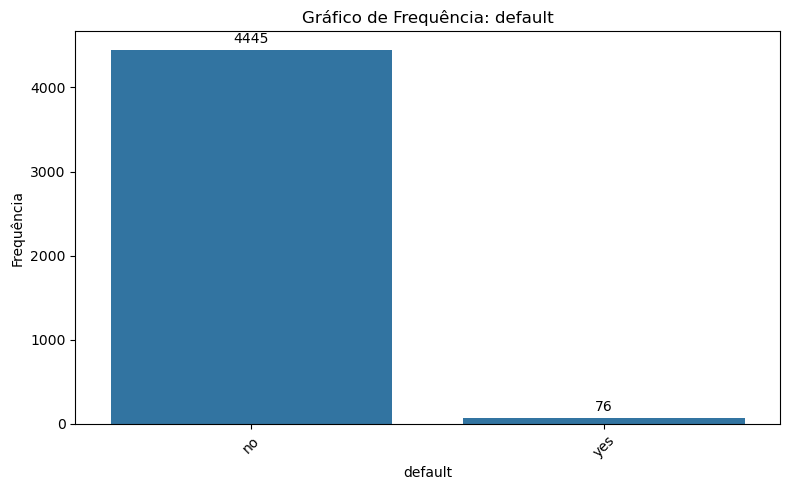

Describe da variável categórica:


,count,unique,top,freq
housing,4521,2,yes,2559


Tabela de frequência da variável categórica (com percentuais e total):


,housing,Frequência,Percentual (%)
0,yes,2559,56.6
1,no,1962,43.4
2,Total,4521,100.0


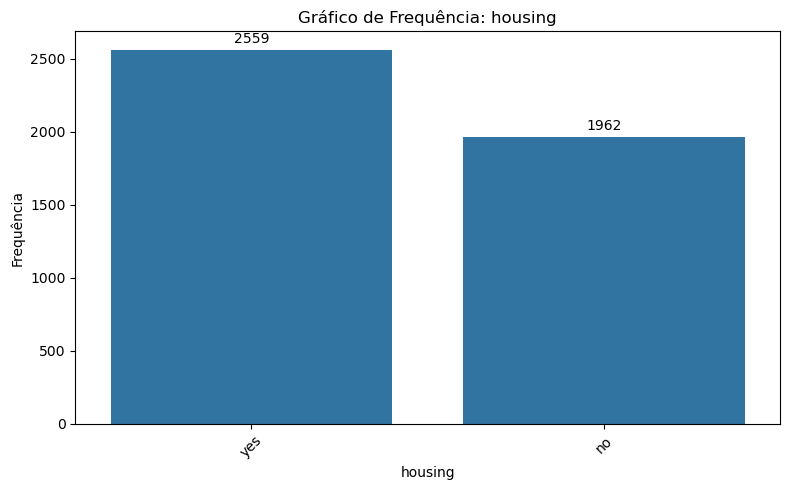

Describe da variável categórica:


,count,unique,top,freq
loan,4521,2,no,3830


Tabela de frequência da variável categórica (com percentuais e total):


,loan,Frequência,Percentual (%)
0,no,3830,84.72
1,yes,691,15.28
2,Total,4521,100.00


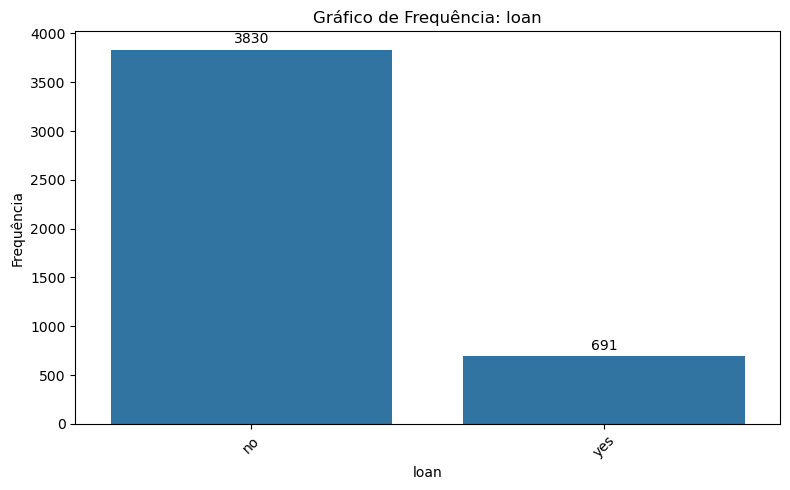

Describe da variável categórica:


,count,unique,top,freq
contact,4521,3,cellular,2896


Tabela de frequência da variável categórica (com percentuais e total):


,contact,Frequência,Percentual (%)
0,cellular,2896,64.06
1,unknown,1324,29.29
2,telephone,301,6.66
3,Total,4521,100.00


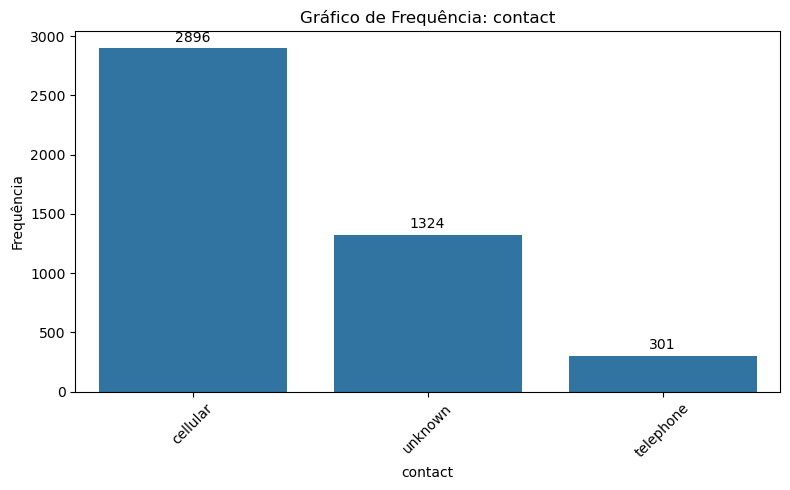

Describe da variável categórica:


,count,unique,top,freq
month,4521,12,may,1398


Tabela de frequência da variável categórica (com percentuais e total):


,month,Frequência,Percentual (%)
0,may,1398,30.92
1,jul,706,15.62
2,aug,633,14.00
3,jun,531,11.75
4,nov,389,8.60
5,apr,293,6.48
6,feb,222,4.91
7,jan,148,3.27
8,oct,80,1.77
9,sep,52,1.15


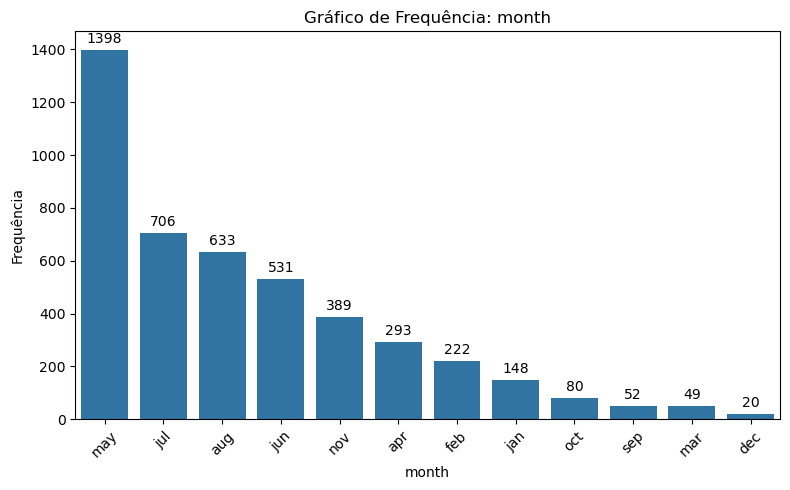

Describe da variável categórica:


,count,unique,top,freq
poutcome,4521,4,unknown,3705


Tabela de frequência da variável categórica (com percentuais e total):


,poutcome,Frequência,Percentual (%)
0,unknown,3705,81.95
1,failure,490,10.84
2,other,197,4.36
3,success,129,2.85
4,Total,4521,100.00


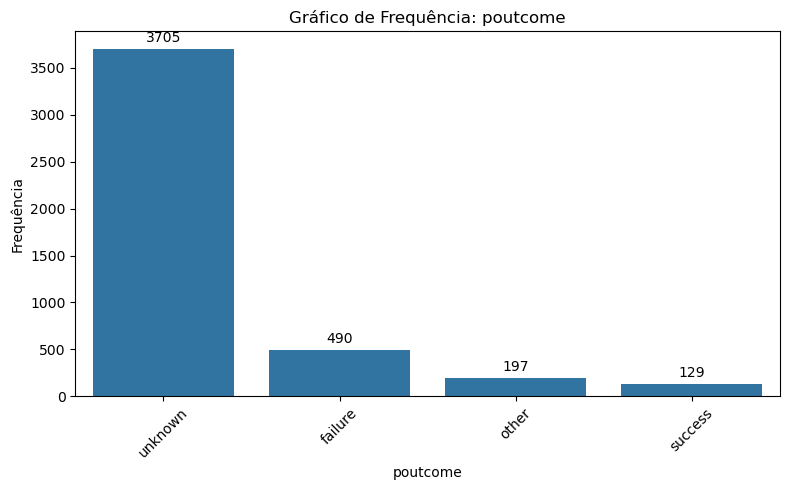

Describe da variável categórica:


,count,unique,top,freq
y,4521,2,no,4000


Tabela de frequência da variável categórica (com percentuais e total):


,y,Frequência,Percentual (%)
0,no,4000,88.48
1,yes,521,11.52
2,Total,4521,100.00


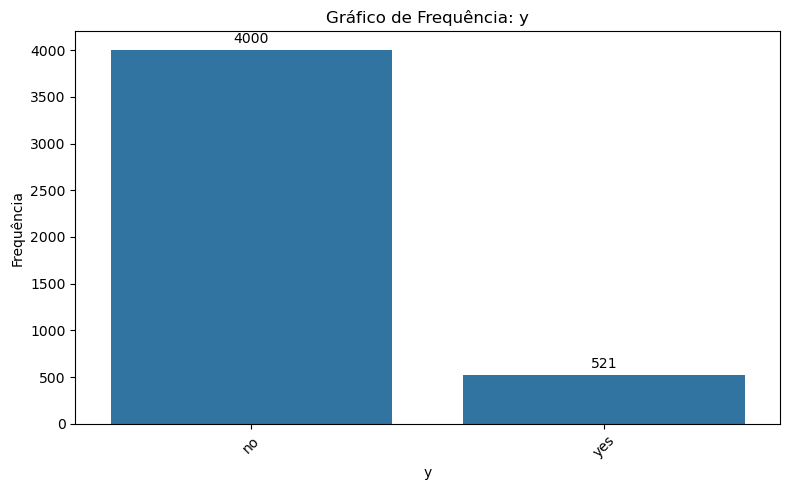

In [7]:
# Analisando varáveis categóricas
for coluna in df_cat.columns:
    funcoes_importantes.univariada_variavel_categoria(df_cat, coluna)

<code style="color:purple">Comentários - Análise Univariada</code>

Fatores a serem observados em cada variável:
Tipo, valores ausentes, unidades de medidas, média e mediana, desvio padrão, coeficiente de variação, Mínimo e Máximo, Distribuição (skew, curtose, histograma), outliers (boxplot), escalas.

| Variável | Comentário                                                                                                                        |
|----------|-----------------------------------------------------------------------------------------------------------------------------------|
| age      | Distribuição se aproxima de uma normal, com alguns outliers para a direita.                                                       |
| balance  | Muitos outliers, especialmente para a direita. Valores negativos.                                                                 |
| day      | Verificar se vale a pena tratar esta variável como categórica. Apesar de skew e curtose serem próximas de 0, o CV é alto, o que indica valores longe da média. Pelos gráficos não podemos considerar dist normal. |
| duration | Alta assimetria, grande concentração de ligações curtas e muitos outliers para a direita. |
| campaign | Muitos outliers para a direita. Verificar se vale tratar como categórica. |
| pdays    | Verificar se faz sentido tratar como categórica. |
| previous | Maioria nunca foi contatado anteriormente. Verificar se vale tratar como categórica. |
| job      | 12 categorias. Categorias retired, self-employed, entrepreneur, unemployed, housemaid, student e unknown poussuem poucas observações, vale a pena agrupar. |
| marital  | 3 categorias. Todas possuem mais de 300 observações. |
| education| 4 categorias. Categoria unknown possui poucas observações, verificar se vale agrupar. |
| default  | 2 categorias, mas com distribuições muito desiguais. Yes possui apenas 1.68% das observações. |
| housing  | 2 categorias, com distribuições similares. |
| loan     | 2 categorias, yes tem 15.28% das observações, mas número de observações suficiente para análise. |
| contact  | 3 categorias, todas com mais de 300 observações. |
| month    | 12 categorias, verificar se faz sentido agrupar por trimestre. |
| poutcome | 4 categorias, verificar comportamento de cada categoria para avaliar se vale agrupar. |
| y        | 2 categorias, distribuição desequilibrada, Yes representa 11.52% das observações. |


## <center>Análise Bivariada

In [8]:
# Convertendo variável y para 0 e 1
df = df_raw.copy()  # Criando uma cópia do DataFrame original
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### Analisando a correlação entre logito de p e variáveis numéricas

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('percentil').agg(


<Figure size 1200x600 with 0 Axes>

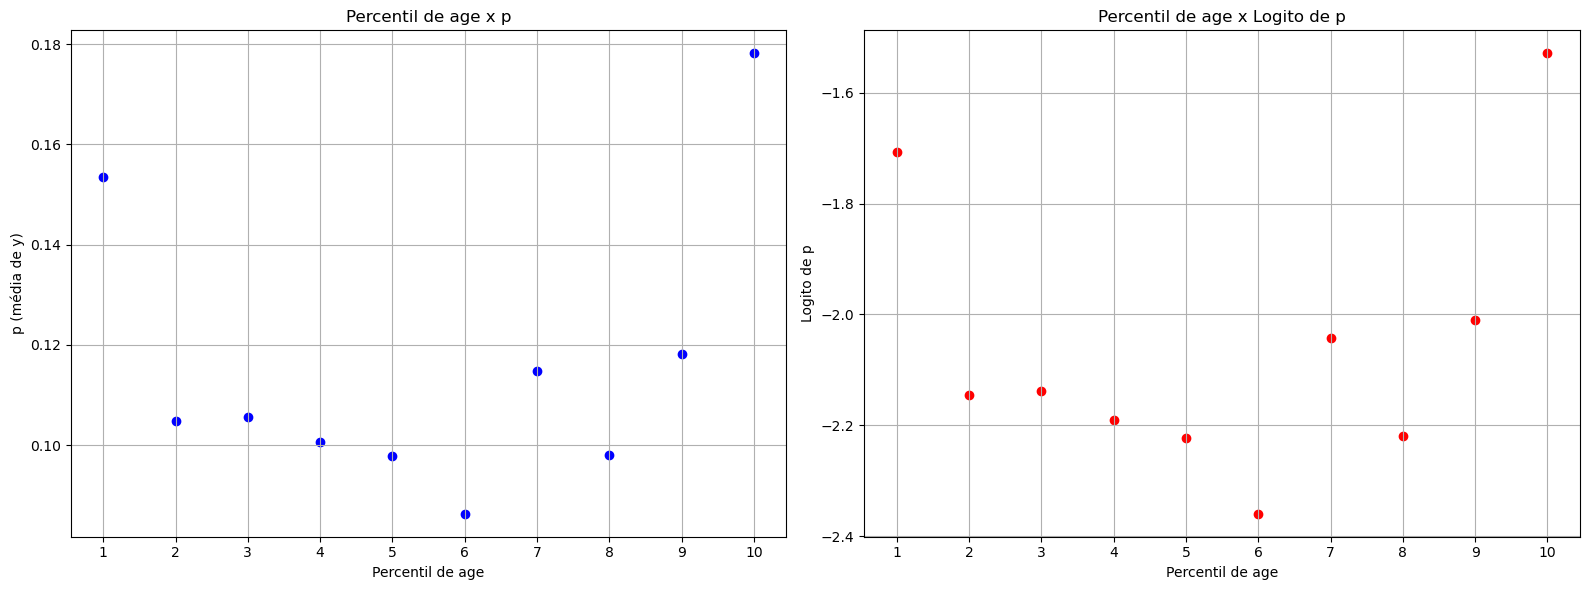

,percentil,n,min_x,max_x,p,logito_p,pearson_r
0,1,482,19,29,0.153527,-1.707202,0.177228
1,2,573,30,32,0.104712,-2.145931,0.177228
2,3,417,33,34,0.105516,-2.137389,0.177228
3,4,368,35,36,0.100543,-2.191200,0.177228
4,5,450,37,39,0.097778,-2.222164,0.177228
5,6,533,40,43,0.086304,-2.359623,0.177228
6,7,444,44,47,0.114865,-2.041984,0.177228
7,8,418,48,51,0.098086,-2.218673,0.177228
8,9,415,52,56,0.118072,-2.010813,0.177228
9,10,421,57,87,0.178147,-1.528951,0.177228


In [9]:
# Analisando a correlação entre logito de p e variáveis numéricas
funcoes_importantes.analise_var_numerica_por_percentil(df, 'age', 'y', q=10, grafico='ambos')

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('percentil').agg(


<Figure size 1200x600 with 0 Axes>

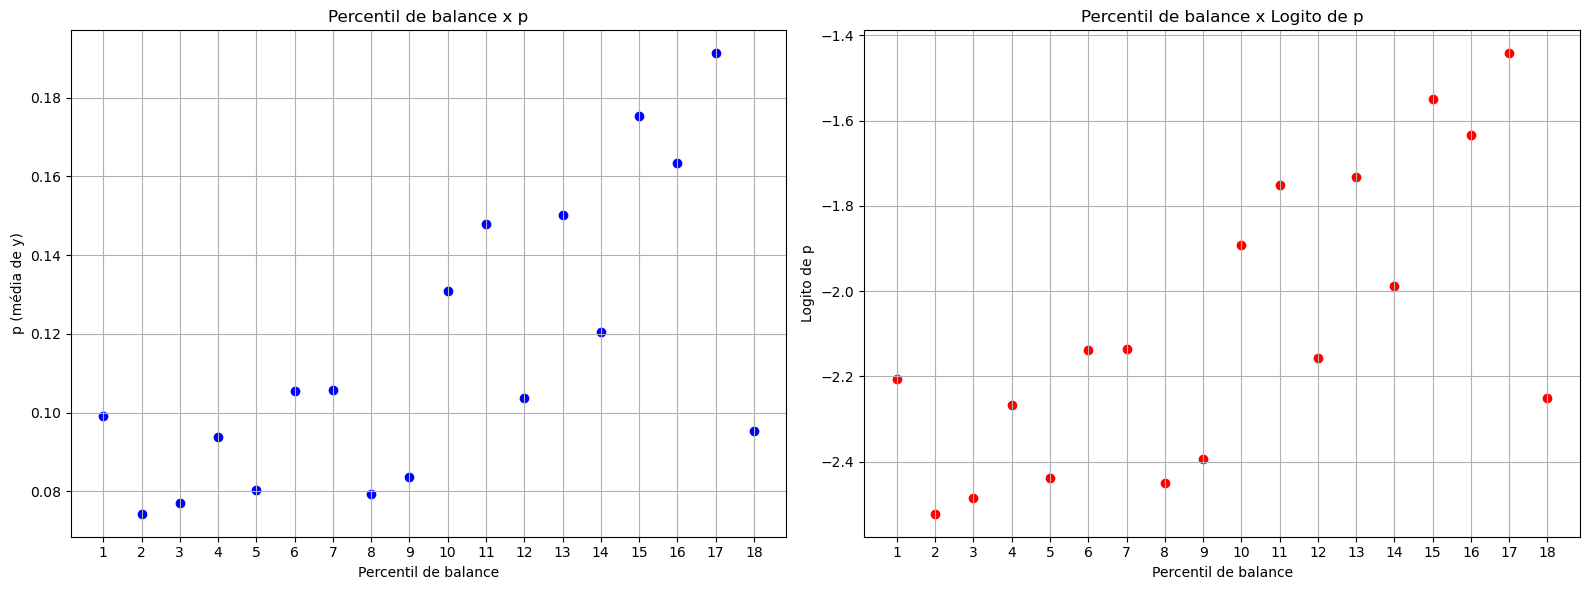

,percentil,n,min_x,max_x,p,logito_p,pearson_r
0,1,252,-3313,-113,0.099206,-2.206074,0.707181
1,2,471,-110,0,0.074310,-2.522294,0.707181
2,3,39,1,2,0.076923,-2.484907,0.707181
3,4,245,3,44,0.093878,-2.267183,0.707181
4,5,249,45,100,0.080321,-2.437990,0.707181
5,6,256,101,174,0.105469,-2.137885,0.707181
6,7,246,175,247,0.105691,-2.135531,0.707181
7,8,252,248,340,0.079365,-2.451005,0.707181
8,9,251,341,444,0.083665,-2.393557,0.707181
9,10,252,445,591,0.130952,-1.892564,0.707181


In [10]:
funcoes_importantes.analise_var_numerica_por_percentil(df, 'balance', 'y', q=18, grafico='ambos')

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('percentil').agg(


<Figure size 1200x600 with 0 Axes>

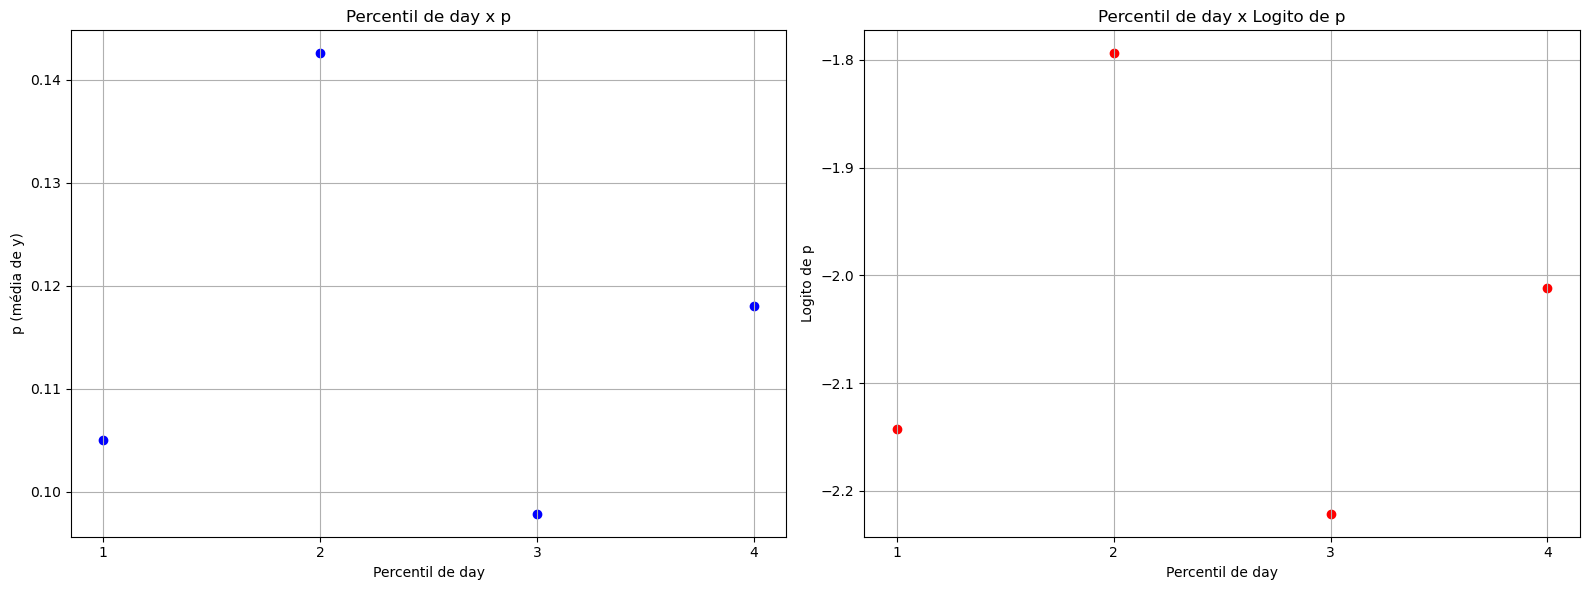

,percentil,n,min_x,max_x,p,logito_p,pearson_r
0,1,1286,1,9,0.104977,-2.143112,-0.022074
1,2,1052,10,16,0.142586,-1.793979,-0.022074
2,3,1073,17,21,0.097856,-2.221272,-0.022074
3,4,1110,22,31,0.118018,-2.011334,-0.022074


In [11]:
funcoes_importantes.analise_var_numerica_por_percentil(df, 'day', 'y', q=4, grafico='ambos')

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('percentil').agg(


<Figure size 1200x600 with 0 Axes>

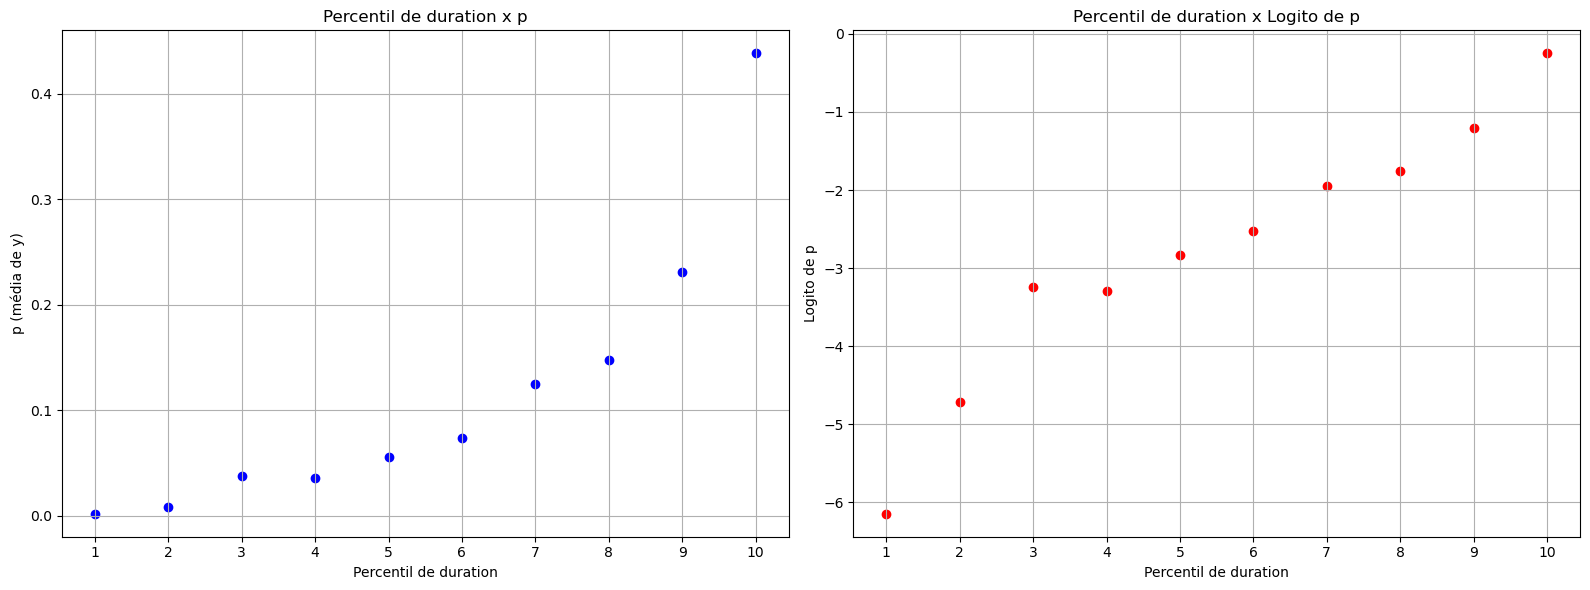

,percentil,n,min_x,max_x,p,logito_p,pearson_r
0,1,468,4,58,0.002137,-6.146329,0.961048
1,2,449,59,89,0.008909,-4.711780,0.961048
2,3,454,90,119,0.037445,-3.246720,0.961048
3,4,446,120,149,0.035874,-3.291196,0.961048
4,5,451,150,185,0.055432,-2.835564,0.961048
5,6,447,186,226,0.073826,-2.529358,0.961048
6,7,457,227,285,0.124726,-1.948413,0.961048
7,8,447,286,383,0.147651,-1.753145,0.961048
8,9,450,384,579,0.231111,-1.202048,0.961048
9,10,452,580,3025,0.438053,-0.249067,0.961048


In [12]:
funcoes_importantes.analise_var_numerica_por_percentil(df, 'duration', 'y', q=10, grafico='ambos')

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:718: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby('percentil').agg(


<Figure size 1200x600 with 0 Axes>

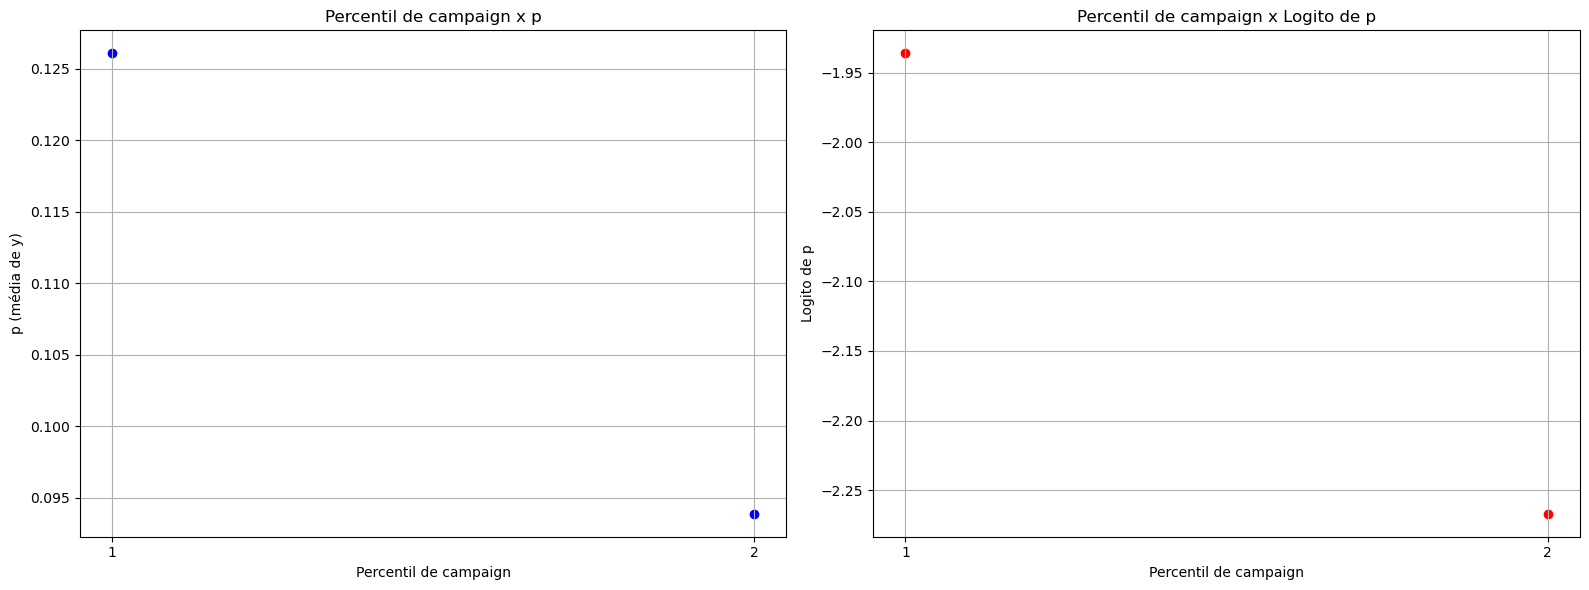

,percentil,n,min_x,max_x,p,logito_p,pearson_r
0,1,2998,1,2,0.126084,-1.936035,-1.0
1,2,1523,3,50,0.093894,-2.266994,-1.0


In [13]:
funcoes_importantes.analise_var_numerica_por_percentil(df, 'campaign', 'y', q=2, grafico='ambos')

<code style="color:purple">Comentários - Análise Bivariada - Variáveis numéricas</code>

Verificando correlação de variáveis numéricas com o logito de p e possíveis categorizações. 

| Variável | Comentário                                                                                                                        |
|----------|-----------------------------------------------------------------------------------------------------------------------------------|
| age      | Não possui correlação com logito de p. Categorizar em menores de 29 anos, entre 29 e 57 anos e acima de 57 anos. |
| balance  | Possui uma leve correlação (0.7) com o logito de p. Manteremos como variável numérica. |
| day      | Categorizar por 1 a 9, 10 a 16, 17 a 21, 22 a 31. |
| duration | Alta correlação, manteremos como numérica. |
| campaign | Categorizar por 1 a 2, 3 a 50. |
| pdays    | Categorizar. Não foi possível separar em percentis devido ao alto número de observações iguais. Categorias: -1 (não contatado), Menos de 180 dias, Mais de 180 dias. |
| previous | Categorizar. Não foi possível separar em percentis devido ao alto número de observações iguais. Categorias: 0, Entre 1 e 2, Mais de 2.|

### Categorizando as variáveis numéricas que não têm correlação linear com logito de p

In [14]:
# Criando categorias para as variáveis age, day, campaign, pdays e previous.
# Criando categorias para a variáel age 'Até 29', '30 a 57', 'Acima de 57'
df['age_cat'] = pd.cut(df['age'], 
                       bins=[-1, 29, 57, np.inf], 
                       labels=['Até 29', '30 a 57', 'Acima de 57'])
df['age_cat'].value_counts()

age_cat
30 a 57        3709
Até 29          482
Acima de 57     330
Name: count, dtype: int64

In [15]:
# Criando categorias para a variável day '1 a 9', '10 a 16', '17 a 21', '22 a 31'
df['day_cat'] = pd.cut(df['day'], 
                       bins=[0, 9, 16, 21, 31], 
                       labels=['1 a 9', '10 a 16', '17 a 21', '22 a 31'])
df['day_cat'].value_counts()

day_cat
1 a 9      1286
22 a 31    1110
17 a 21    1073
10 a 16    1052
Name: count, dtype: int64

In [16]:
# Criando categorias para a variável campaign '1 a 2', 'mais de 2'
df['campaign_cat'] = pd.cut(df['campaign'], 
                            bins=[0, 2, np.inf], 
                            labels=['1 a 2', 'mais de 2'])
df['campaign_cat'].value_counts()

campaign_cat
1 a 2        2998
mais de 2    1523
Name: count, dtype: int64

In [17]:
# Criando categorias para a variável pdays 'Não contatado' quando -1, 'Menos de 180 dias', 'Mais de 180 dias'
df['pdays_cat'] = pd.cut(df['pdays'],
                        bins=[-2, 0, 180, np.inf], 
                        labels=['Não contatado', 'Menos de 180 dias', 'Mais de 180 dias'])
df['pdays_cat'].value_counts()

pdays_cat
Não contatado        3705
Mais de 180 dias      486
Menos de 180 dias     330
Name: count, dtype: int64

In [18]:
# Criando categorias para a variável previous '0', '1 a 2', 'Mais de 2'
df['previous_cat'] = pd.cut(df['previous'], 
                            bins=[-1, 0, 2, np.inf], 
                            labels=['0', '1 a 2', 'Mais de 2'])
df['previous_cat'].value_counts()

previous_cat
0            3705
1 a 2         479
Mais de 2     337
Name: count, dtype: int64

### Analisando a relação das variáveis categóricas com o y

In [19]:
# Criando uma cópia do DataFrame para análise de variáveis categóricas
df_cat = df.select_dtypes(include=['object', 'category']).copy()
# Adicionando a variável target 'y' ao DataFrame de variáveis categóricas
df_cat['y'] = df['y']
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_cat,day_cat,campaign_cat,pdays_cat,previous_cat,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,30 a 57,17 a 21,1 a 2,Não contatado,0,0
1,services,married,secondary,no,yes,yes,cellular,may,failure,30 a 57,10 a 16,1 a 2,Mais de 180 dias,Mais de 2,0
2,management,single,tertiary,no,yes,no,cellular,apr,failure,30 a 57,10 a 16,1 a 2,Mais de 180 dias,1 a 2,0
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,30 a 57,1 a 9,mais de 2,Não contatado,0,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,Acima de 57,1 a 9,1 a 2,Não contatado,0,0


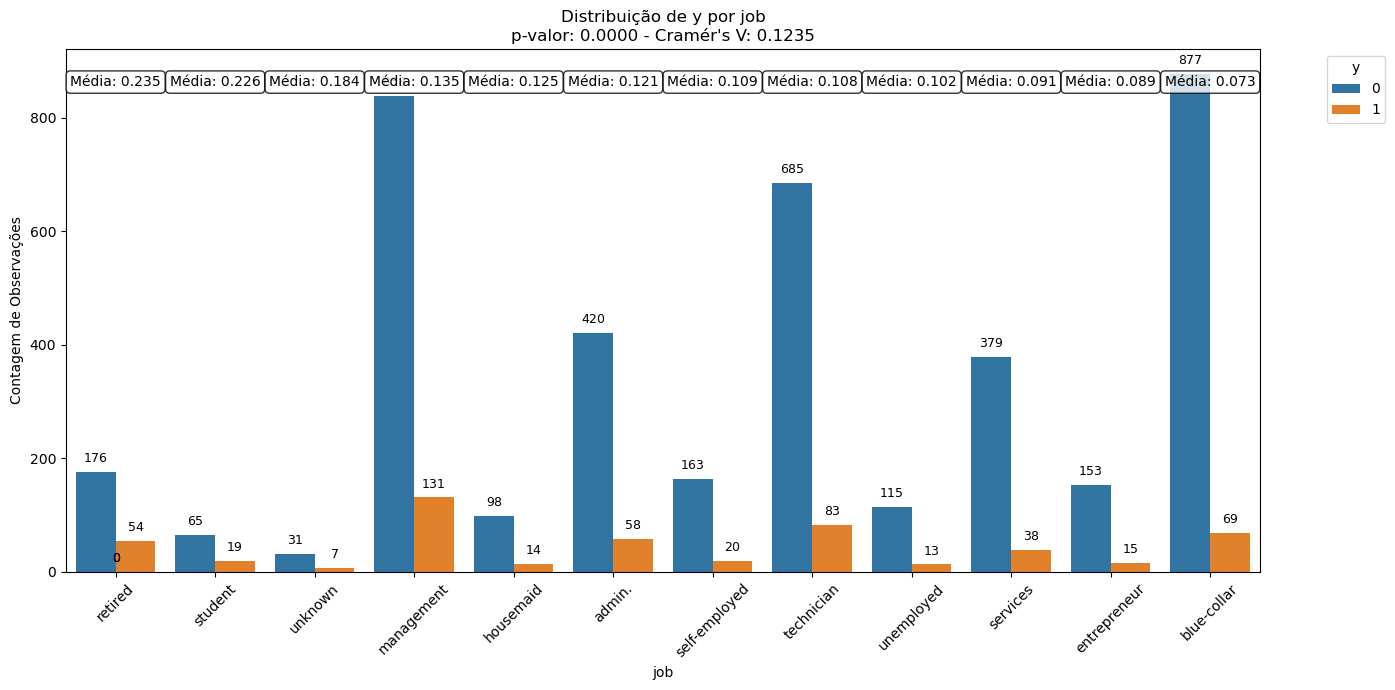

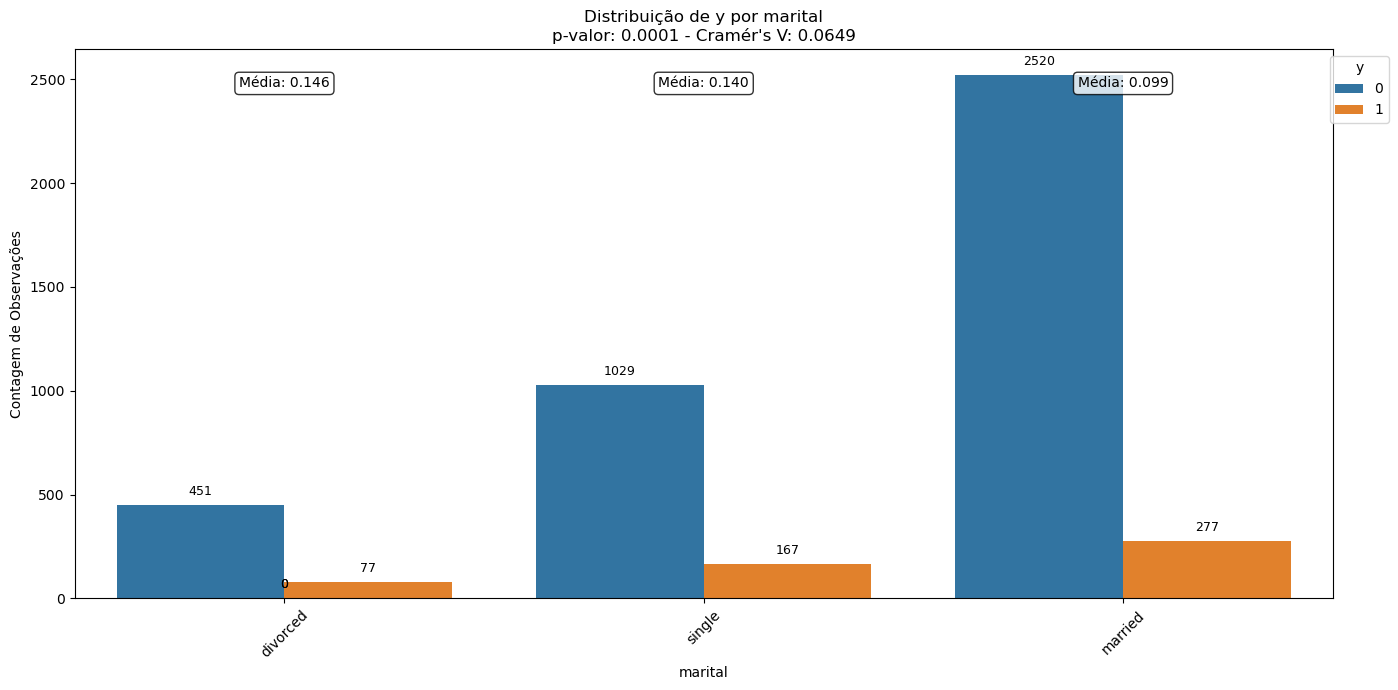

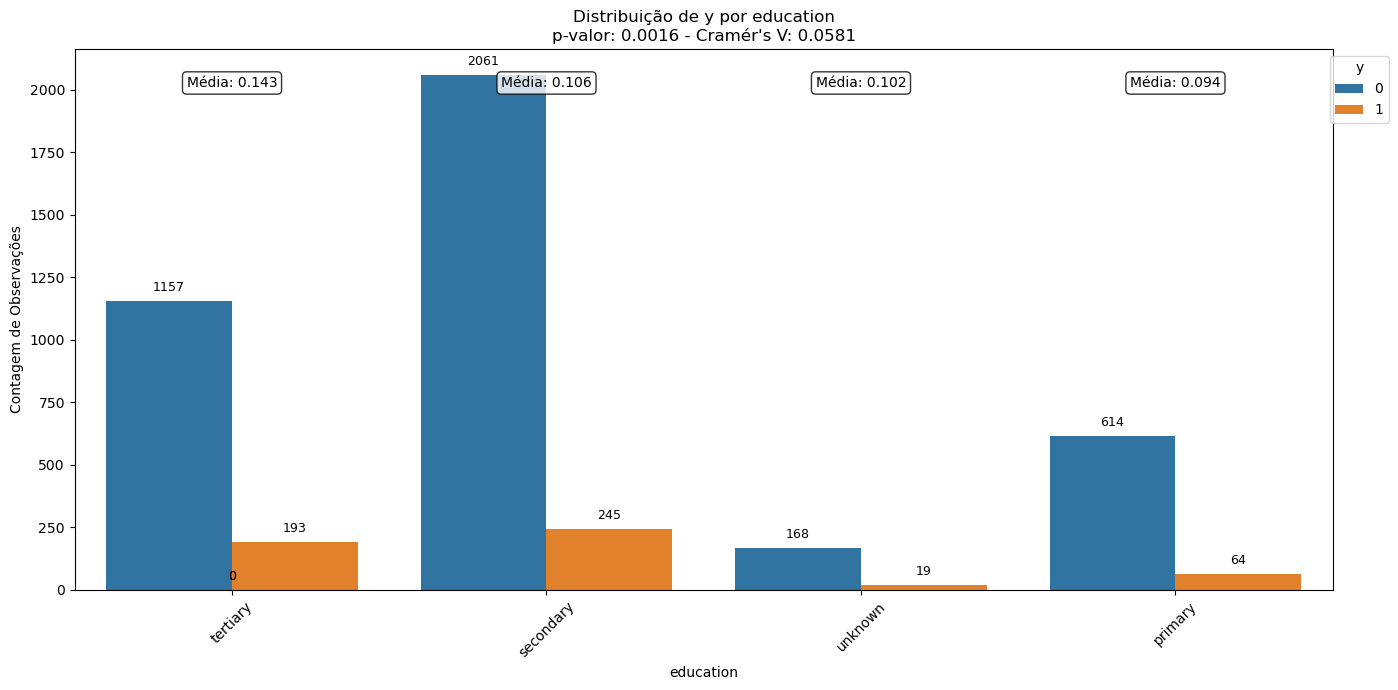

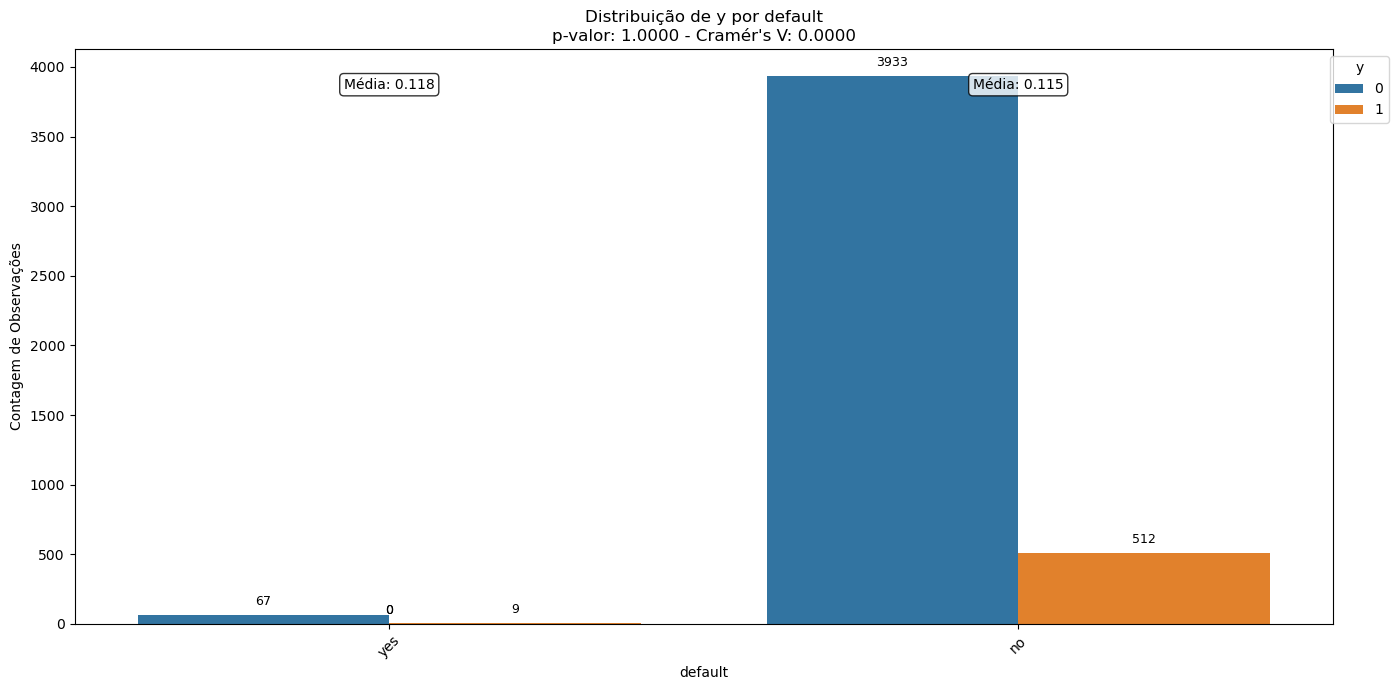

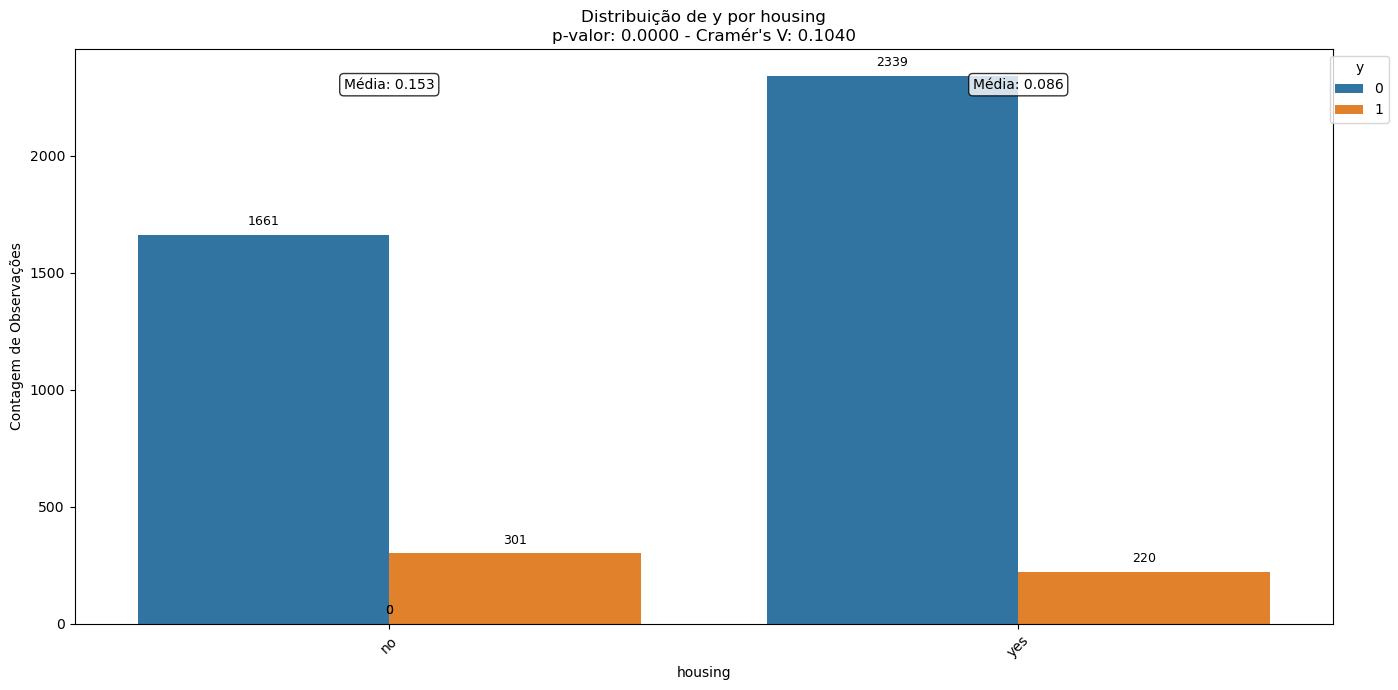

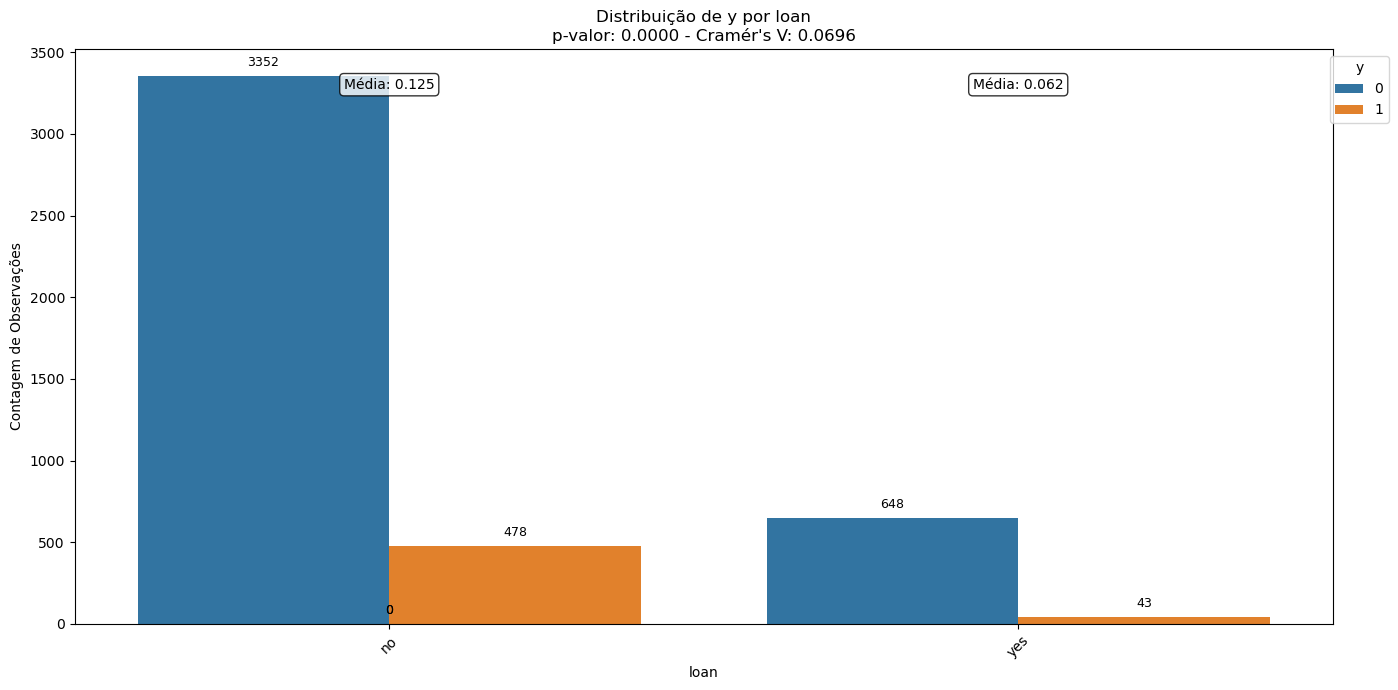

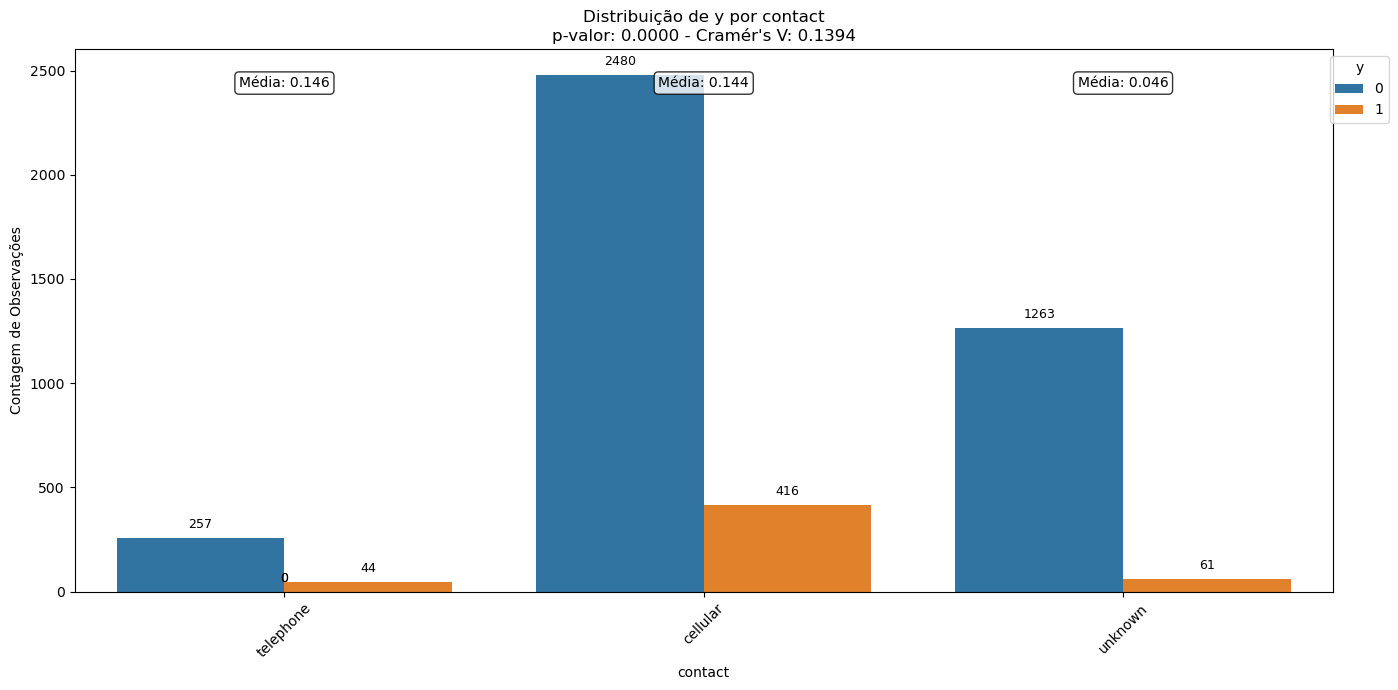

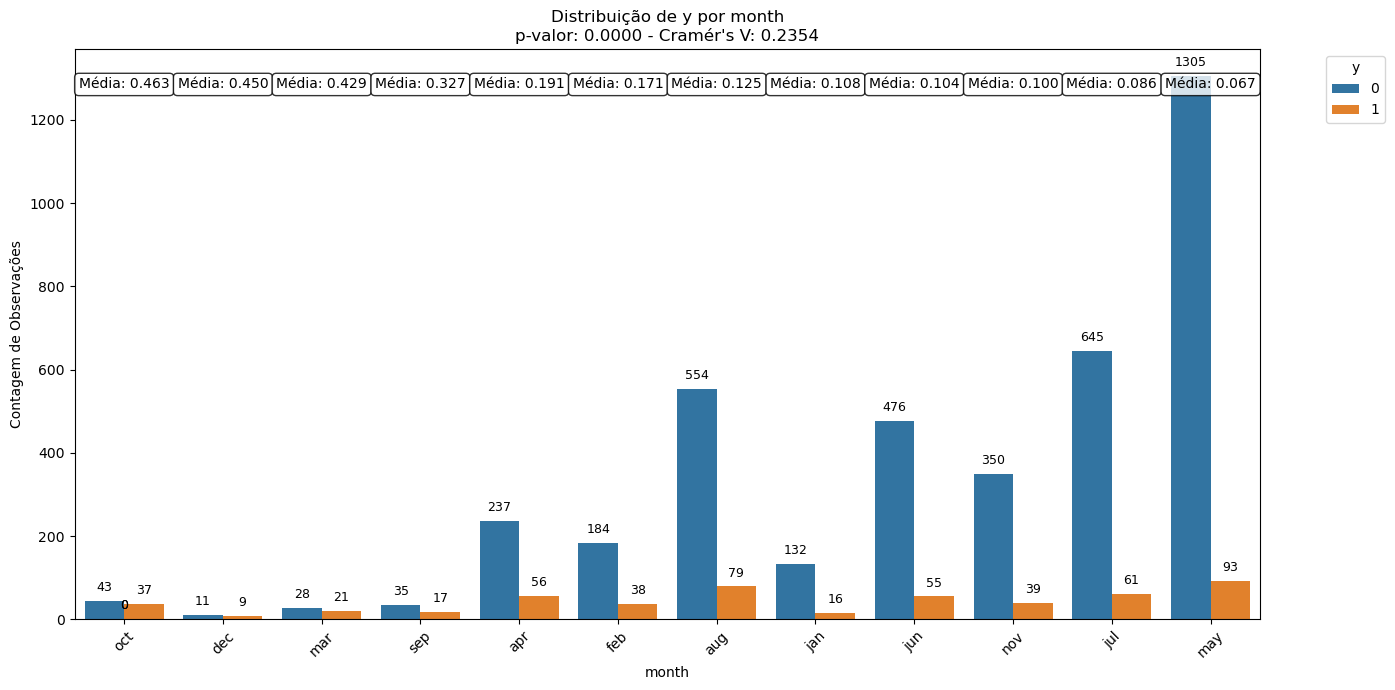

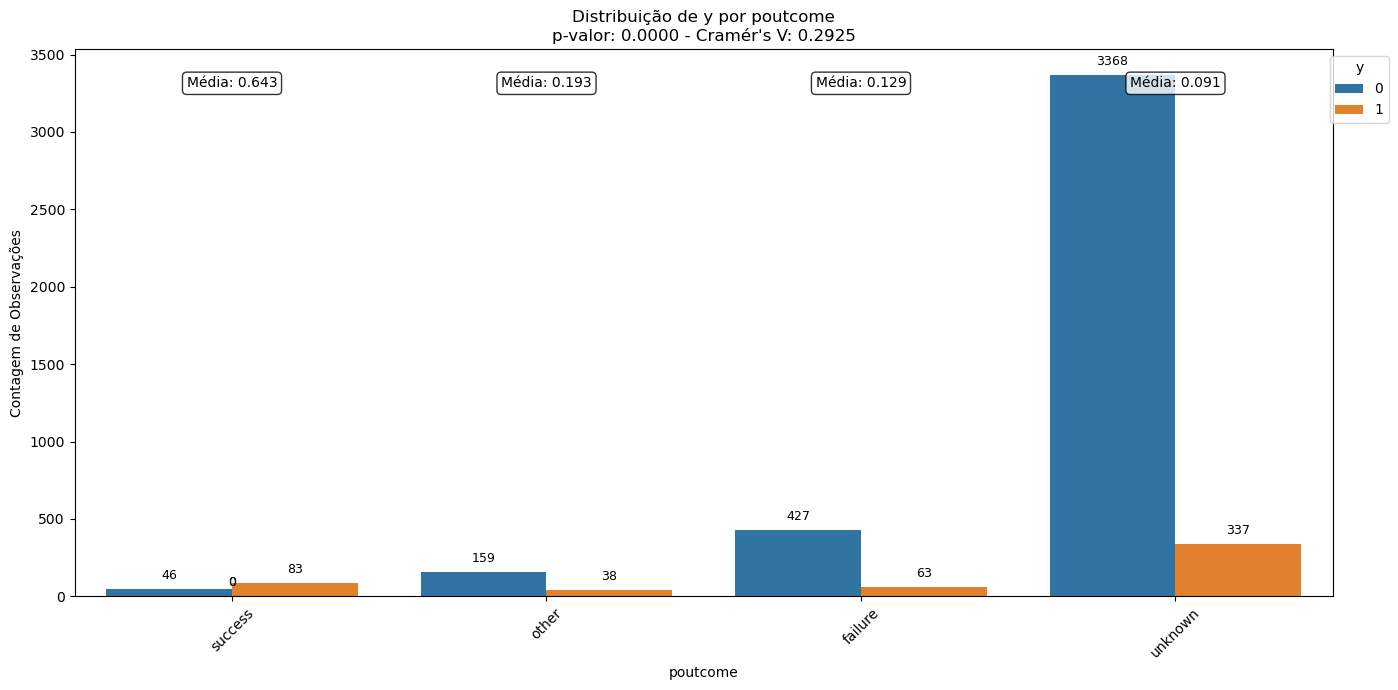

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


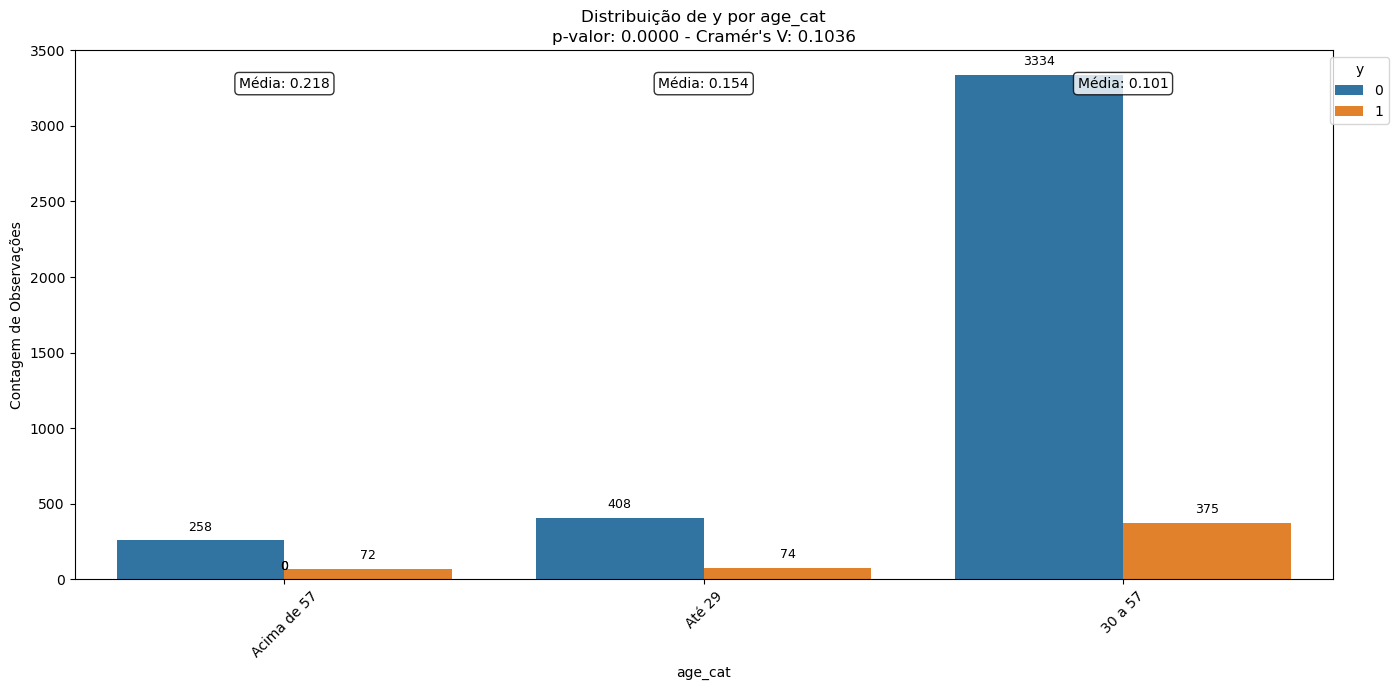

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


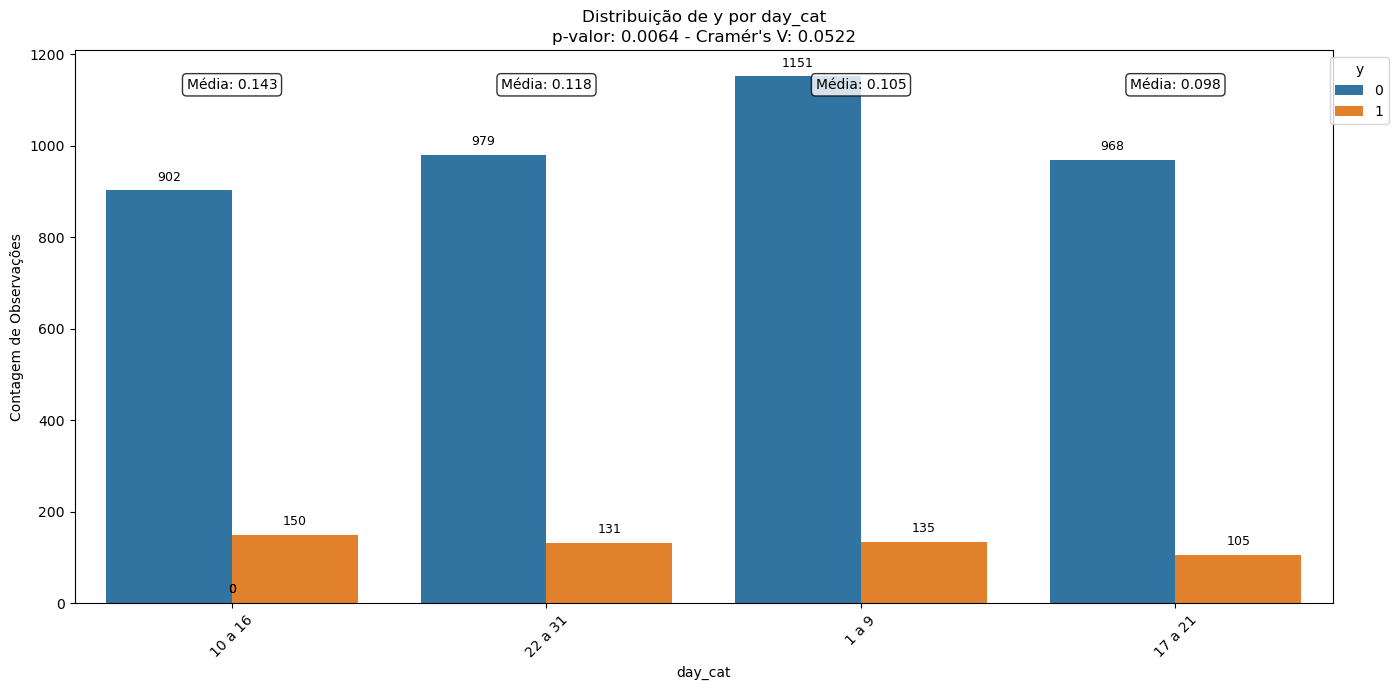

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


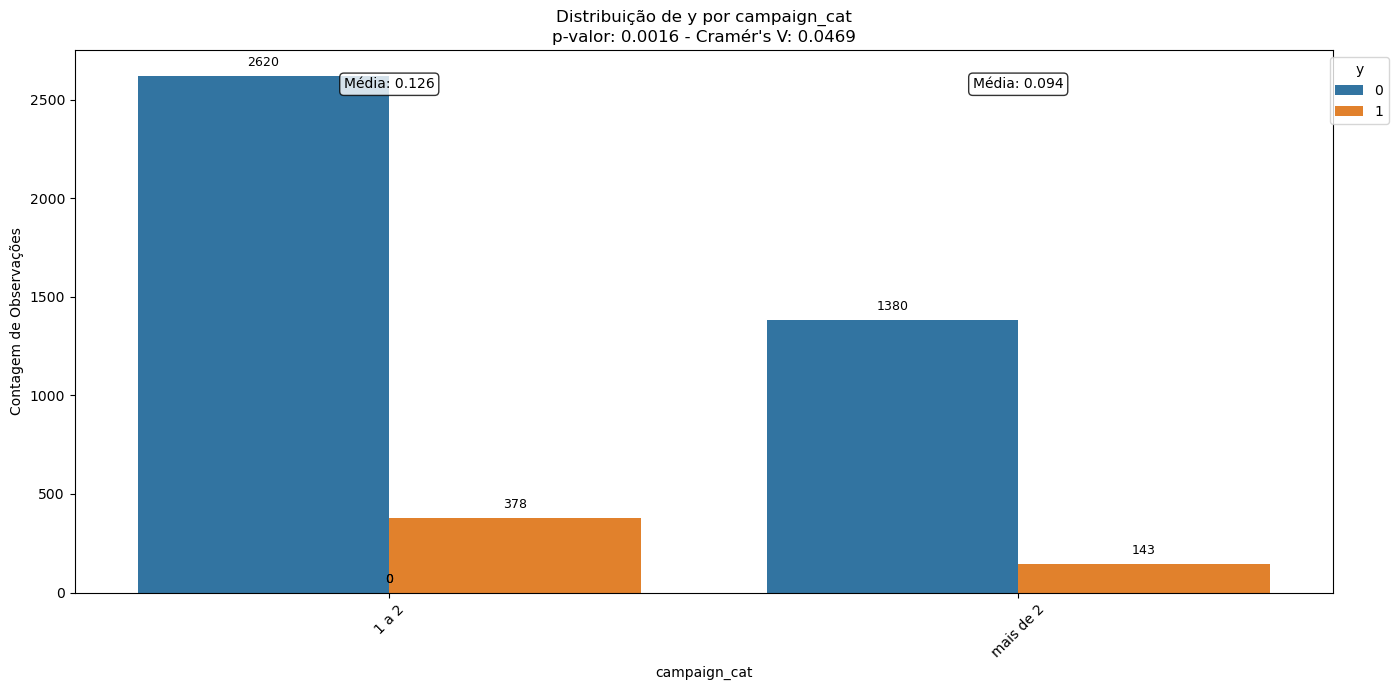

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


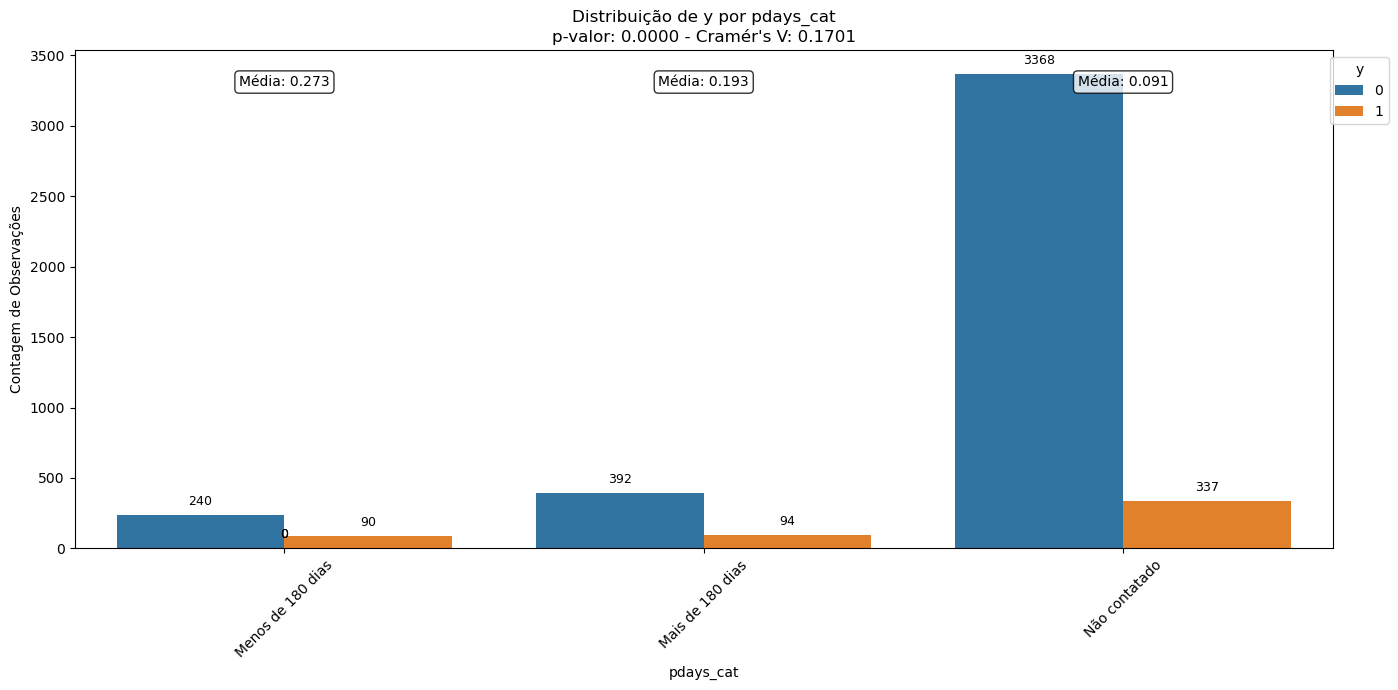

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


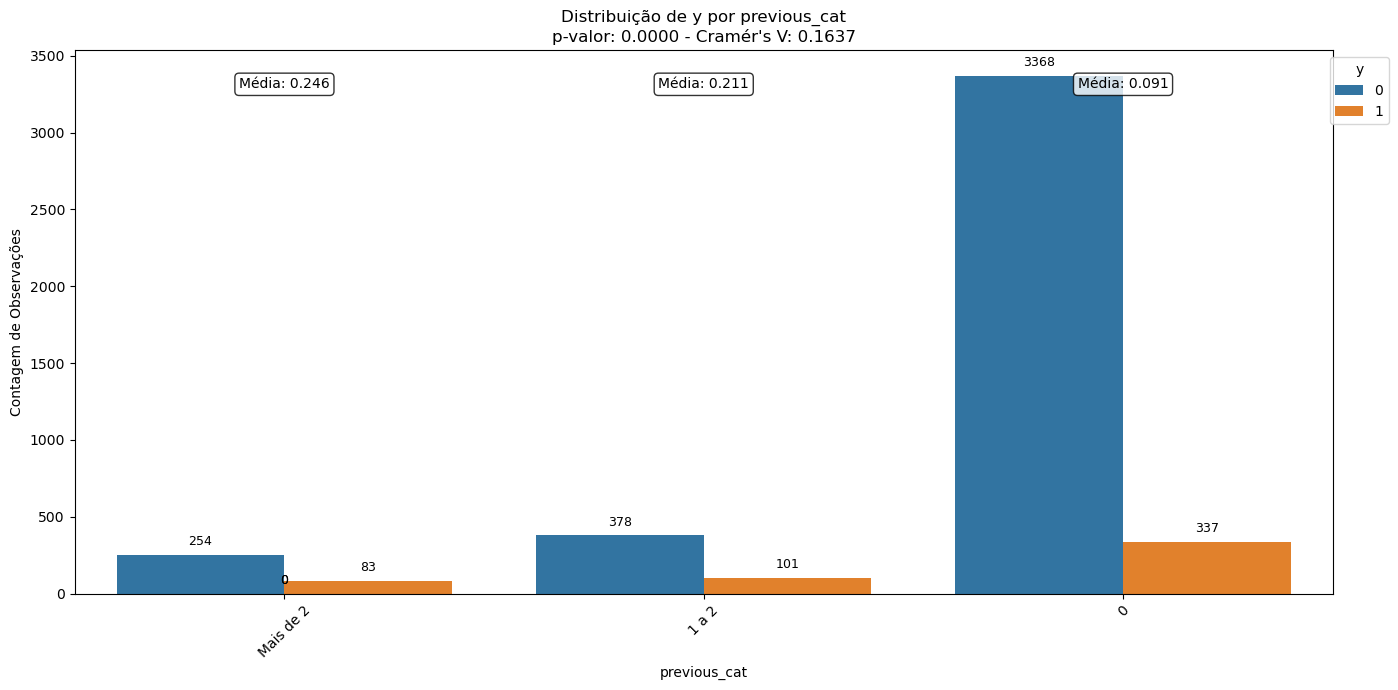

        Variável       p-valor  Cramér_V
8       poutcome  1.539883e-83  0.292529
7          month  2.195355e-47  0.235389
12     pdays_cat  3.896098e-29  0.170113
13  previous_cat  4.950787e-27  0.163692
6        contact  8.304301e-20  0.139413
4        housing  2.714700e-12  0.103985
9        age_cat  2.946769e-11  0.103570
0            job  1.901391e-10  0.123529
5           loan  2.914829e-06  0.069554
1        marital  7.373535e-05  0.064879
11  campaign_cat  1.607768e-03  0.046915
2      education  1.625240e-03  0.058053
10       day_cat  6.398695e-03  0.052177
3        default  1.000000e+00  0.000000


In [20]:
# Analisando a relação entre variáveis categóricas e o target 'y'
'''
Interpretação dos resultados:
        p-valor < 0.05: Relação estatisticamente significativa
        Cramer's V:
            0: Nenhuma associação
            0.1: Fraca
            0.3: Moderada
            0.5+: Forte
'''
resultados = funcoes_importantes.analise_categorias_vs_target(df_cat, target='y', graficos=True)
print(resultados)

<code style="color:purple">Comentários - Análise Bivariada - Variáveis Categóricas</code>

Analisar possíveis agrupamentos para reduzir quantidade de níveis em cada variável categórica, evitando multicolinearidade.

| Variável | Comentário                                                                                                                        |
|----------|-----------------------------------------------------------------------------------------------------------------------------------|
| age_cat  | Significativa, baixa correlação. Manter níveis. |
| balance  | Mantida como variável numérica. |
| day_cat  | Significativa, baixa correlação. Manter níveis. |
| duration | Mantida como variável numérica. |
| campaign_cat | Significativa, baixa correlação. Manter níveis |
| pdays_cat| Significativa, baixa correlação. Manter níveis |
| previous_cat| Significativa, baixa correlação. Manter níveis |
| job      | Significativa, baixa correlação. Agrupar níveis com médias de y semelhantes e que façam sentido para o contexto de negócio. (student + retired + unknown; housemaid + admin; self-employed + technician + unemployed; entrepreneur + services; ) |
| marital  | Significativa, baixa correlação. Agrupar single + divorced pois possuem taxas de probabilidade muito próximas. |
| education| Significativa, baixa correlação. Agrupar unknown com primary, pois têm taxa de probabilidade de y próximas e são os níveis com menor n. de observações. |
| default  | Não significativa e sem correlação. Não utilizar no modelo. |
| housing  | Significativa, baixa correlação. Manter níveis. |
| loan     | Significativa, baixa correlação. Níveis com número de observações suficientes. |
| contact  | Significativa, baixa correlação. Manter níveis para testar significância de cada nível. |
| month    | Significativa, baixa correlação. Testar agrupamento por trimestre |
| poutcome | Significativa, correlação moderada. Agrupar other com success para aumentar o número de observações do nível. |


### <center>Agrupando categorias

In [21]:
# Agrupando categorias da variável 'job' (student + retired + unknown; housemaid + admin; self-employed + technician + unemployed; entrepreneur + services)
df['job_agg'] = df['job'].replace({
    'student': 'student + retired + unknown',
    'retired': 'student + retired + unknown',
    'unknown': 'student + retired + unknown',
    'housemaid': 'housemaid + admin',
    'admin.': 'housemaid + admin',
    'self-employed': 'self-employed + technician + unemployed',
    'technician': 'self-employed + technician + unemployed',
    'unemployed': 'self-employed + technician + unemployed',
    'entrepreneur': 'entrepreneur + services',
    'services': 'entrepreneur + services'
})

# Agrupando categorias da variável 'marital' (single + divorced)
df['marital_agg'] = df['marital'].replace({
    'single': 'single + divorced',
    'divorced': 'single + divorced'
})

# Agrupando categorias da variável 'education' (unknown + primary)
df['education_agg'] = df['education'].replace({
    'unknown': 'unknown + primary',
    'primary': 'unknown + primary'
})

# Agrupando categorias da variável 'month' por trimestres
df['month_agg'] = df['month'].replace({
    'jan': '1º trimestre',
    'feb': '1º trimestre',
    'mar': '1º trimestre',
    'apr': '2º trimestre',
    'may': '2º trimestre',
    'jun': '2º trimestre',
    'jul': '3º trimestre',
    'aug': '3º trimestre',
    'sep': '3º trimestre',
    'oct': '4º trimestre',
    'nov': '4º trimestre',
    'dec': '4º trimestre'
})

# Agrupando categorias da variável 'poutcome' (success + other)
df['poutcome_agg'] = df['poutcome'].replace({
    'success': 'success + other',
    'other': 'success + other'
})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,age_cat,day_cat,campaign_cat,pdays_cat,previous_cat,job_agg,marital_agg,education_agg,month_agg,poutcome_agg
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,30 a 57,17 a 21,1 a 2,Não contatado,0,self-employed + technician + unemployed,married,unknown + primary,4º trimestre,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,30 a 57,10 a 16,1 a 2,Mais de 180 dias,Mais de 2,entrepreneur + services,married,secondary,2º trimestre,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,30 a 57,10 a 16,1 a 2,Mais de 180 dias,1 a 2,management,single + divorced,tertiary,2º trimestre,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,30 a 57,1 a 9,mais de 2,Não contatado,0,management,married,tertiary,2º trimestre,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,Acima de 57,1 a 9,1 a 2,Não contatado,0,blue-collar,married,secondary,2º trimestre,unknown


In [22]:
# Criando um df apenas com as variáveis que nos interessam para análise
df_analise = df[['age_cat', 'balance', 'day_cat', 'duration', 'campaign_cat', 'pdays_cat', 'previous_cat', 'job_agg', 'marital_agg', 
                 'education_agg', 'housing', 'loan', 'contact', 'month_agg', 'poutcome_agg', 'y']].copy()

df_analise.head()

,age_cat,balance,day_cat,duration,campaign_cat,pdays_cat,previous_cat,job_agg,marital_agg,education_agg,housing,loan,contact,month_agg,poutcome_agg,y
0,30 a 57,1787,17 a 21,79,1 a 2,Não contatado,0,self-employed + technician + unemployed,married,unknown + primary,no,no,cellular,4º trimestre,unknown,0
1,30 a 57,4789,10 a 16,220,1 a 2,Mais de 180 dias,Mais de 2,entrepreneur + services,married,secondary,yes,yes,cellular,2º trimestre,failure,0
2,30 a 57,1350,10 a 16,185,1 a 2,Mais de 180 dias,1 a 2,management,single + divorced,tertiary,yes,no,cellular,2º trimestre,failure,0
3,30 a 57,1476,1 a 9,199,mais de 2,Não contatado,0,management,married,tertiary,yes,yes,unknown,2º trimestre,unknown,0
4,Acima de 57,0,1 a 9,226,1 a 2,Não contatado,0,blue-collar,married,secondary,yes,no,unknown,2º trimestre,unknown,0


c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


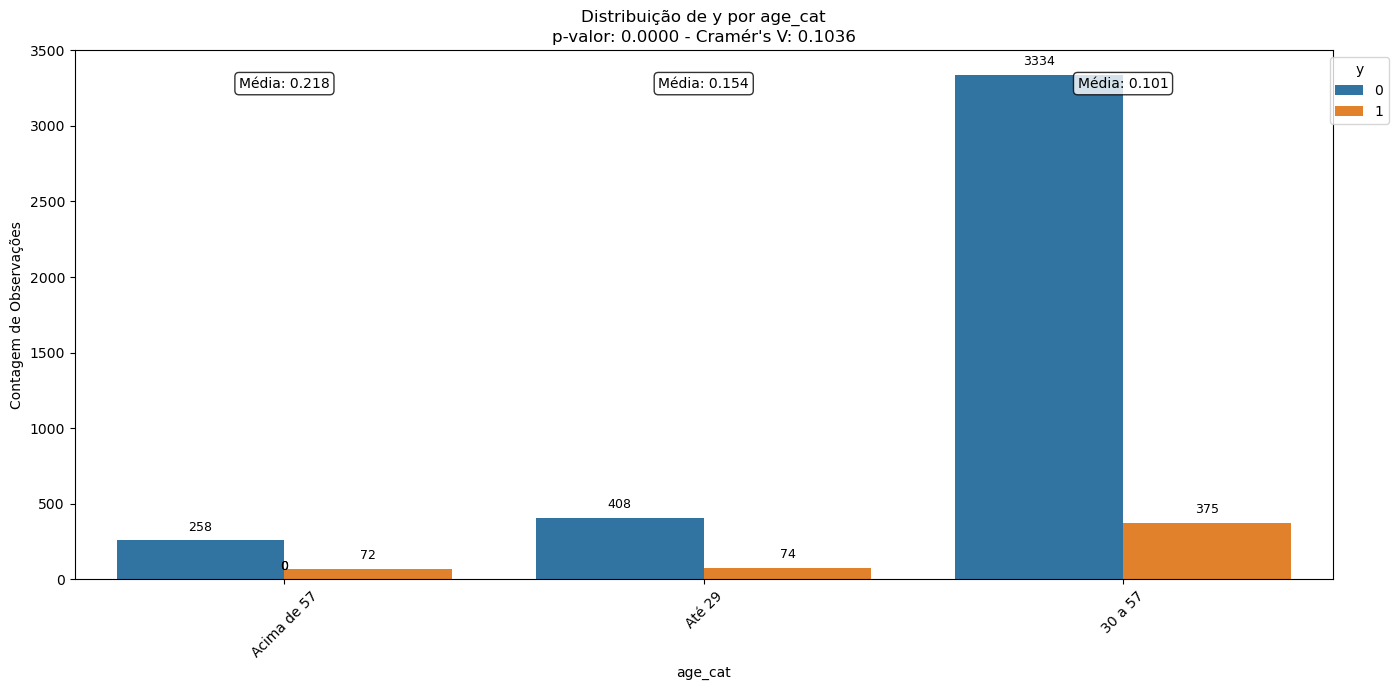

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


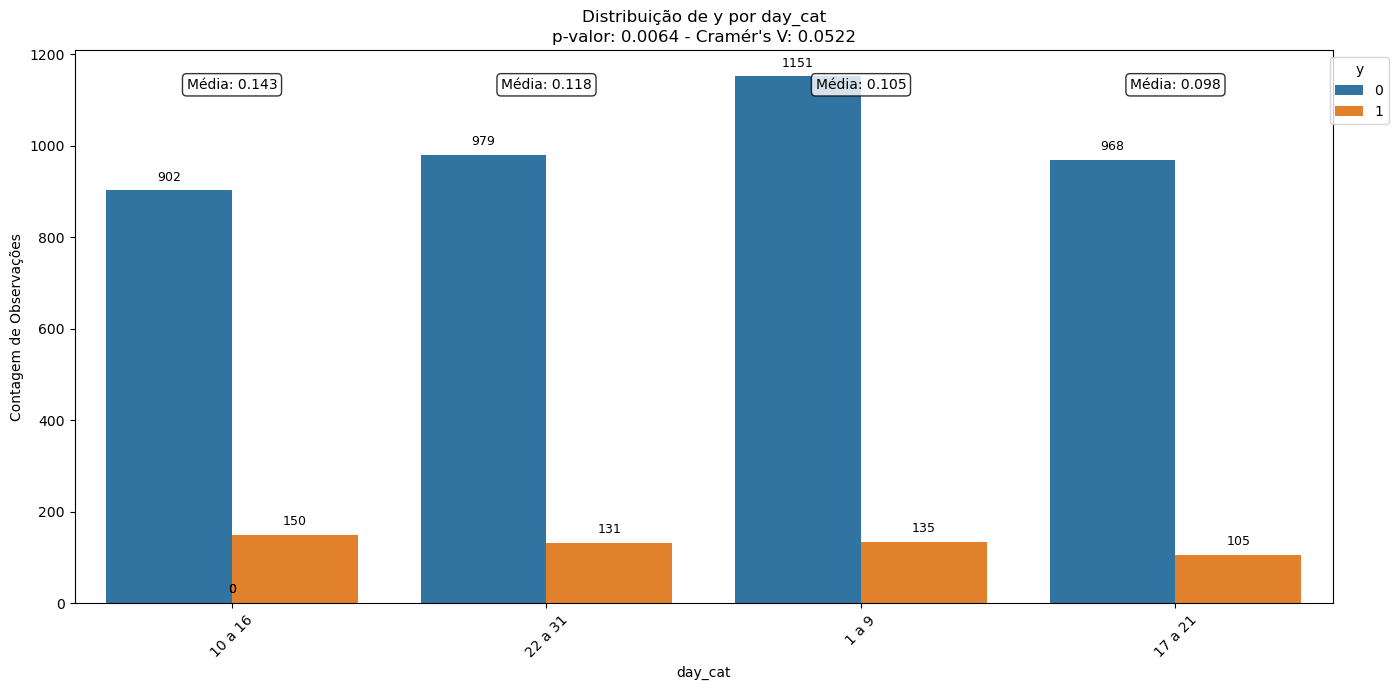

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


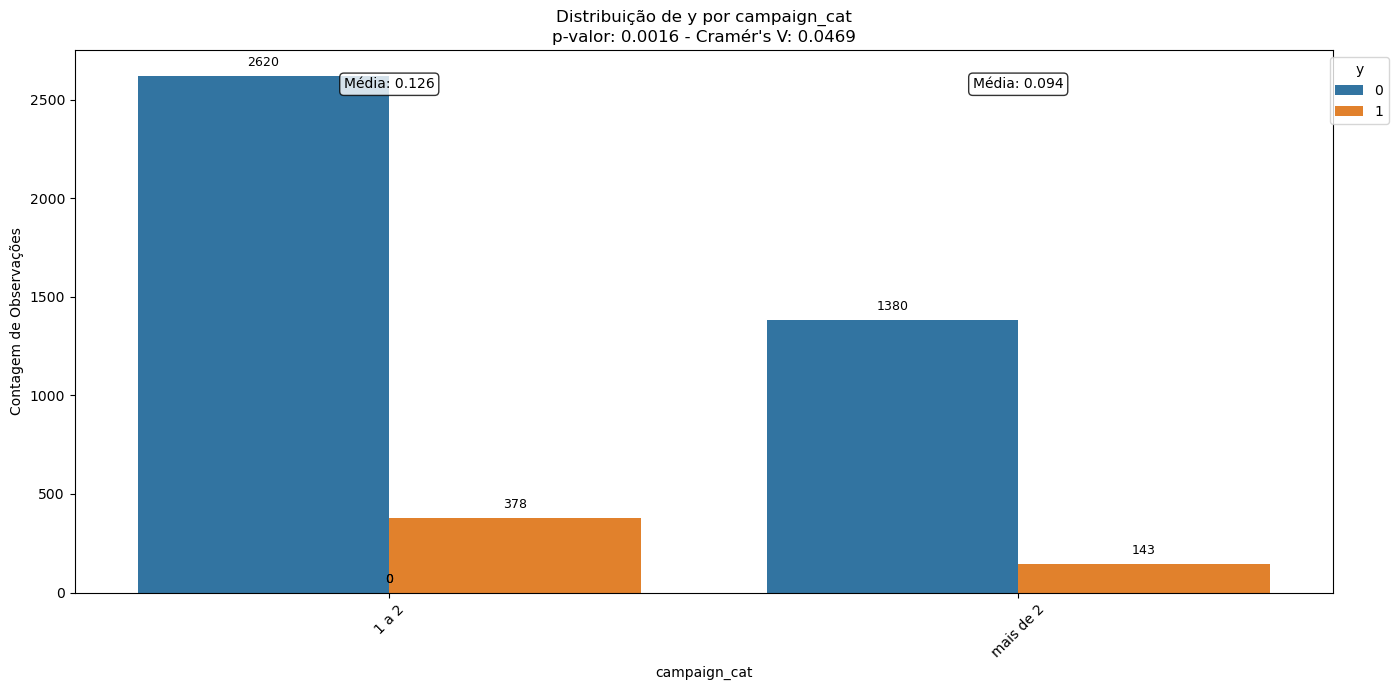

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


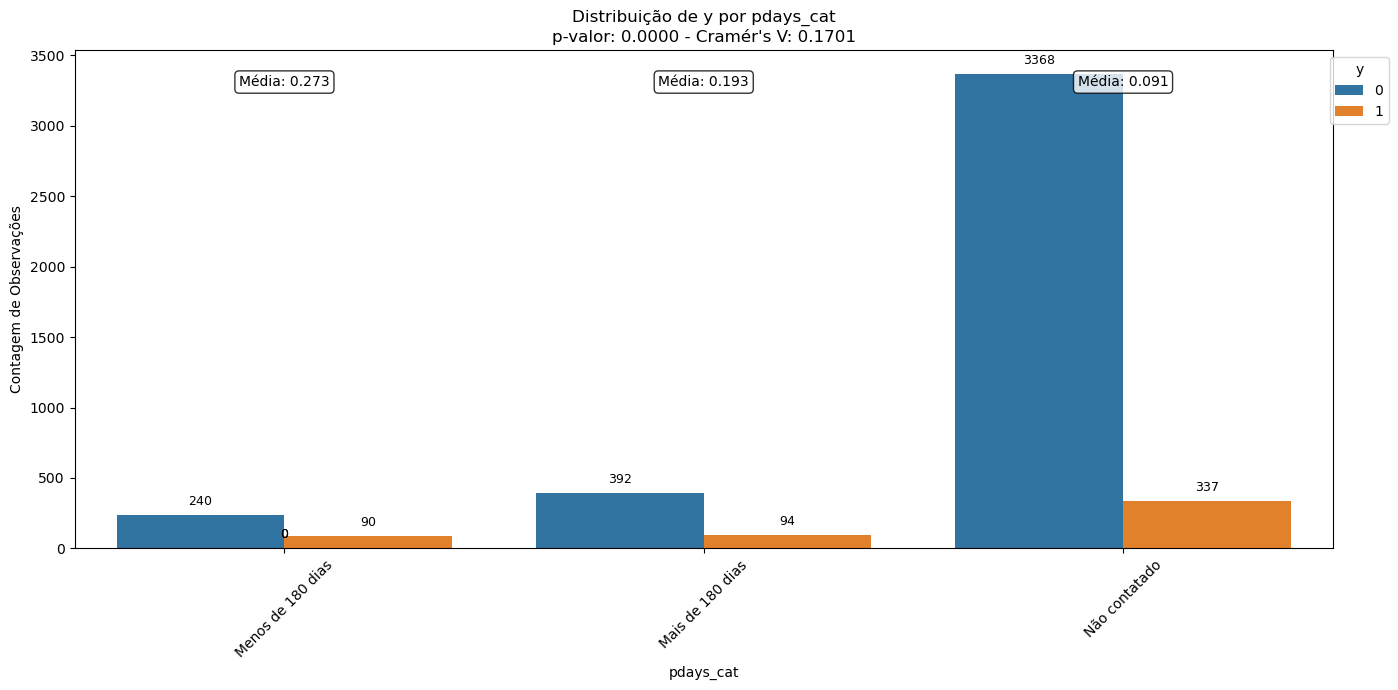

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:1005: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = df.groupby(var)[target].agg(['count', 'mean']).reset_index()


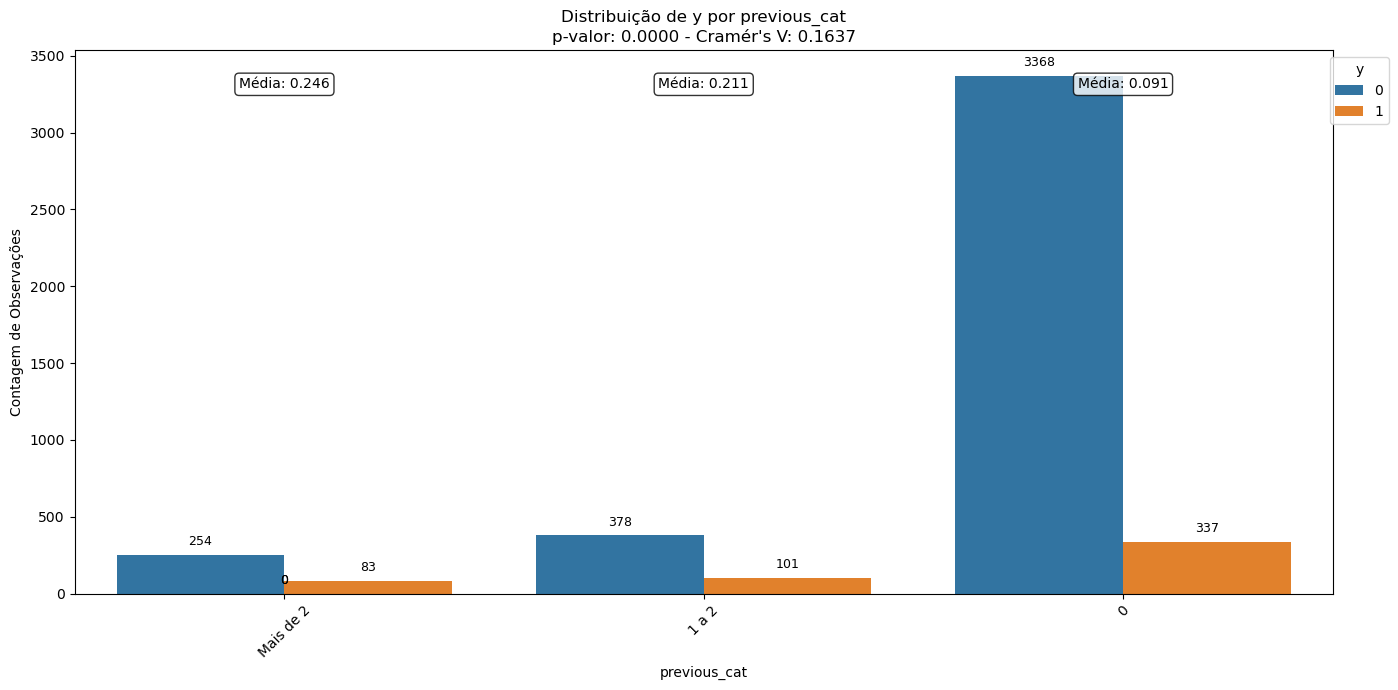

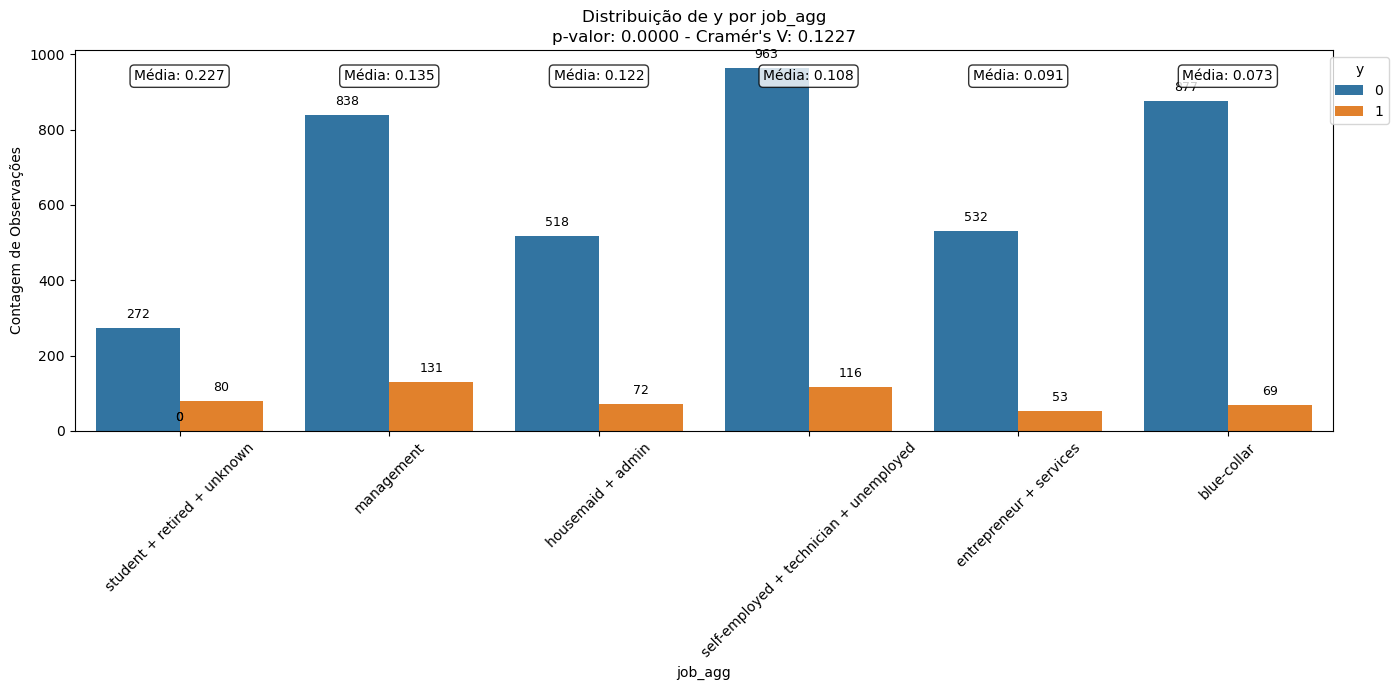

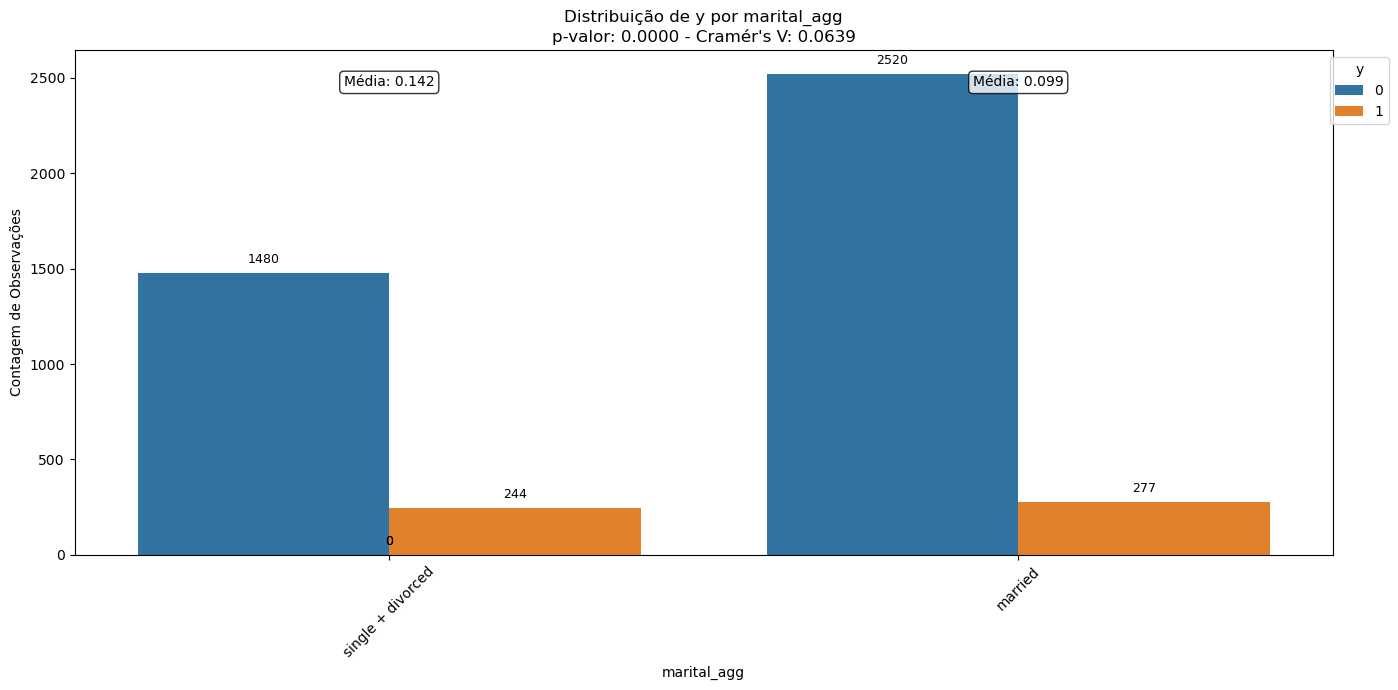

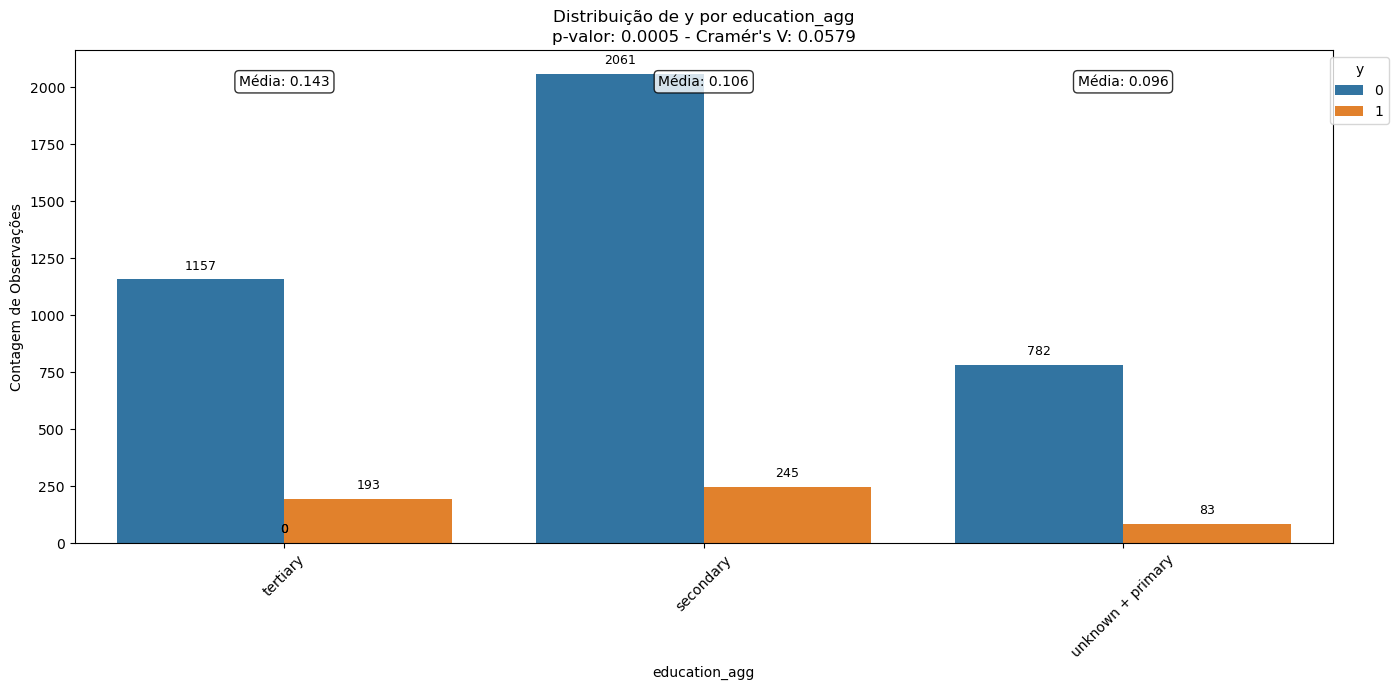

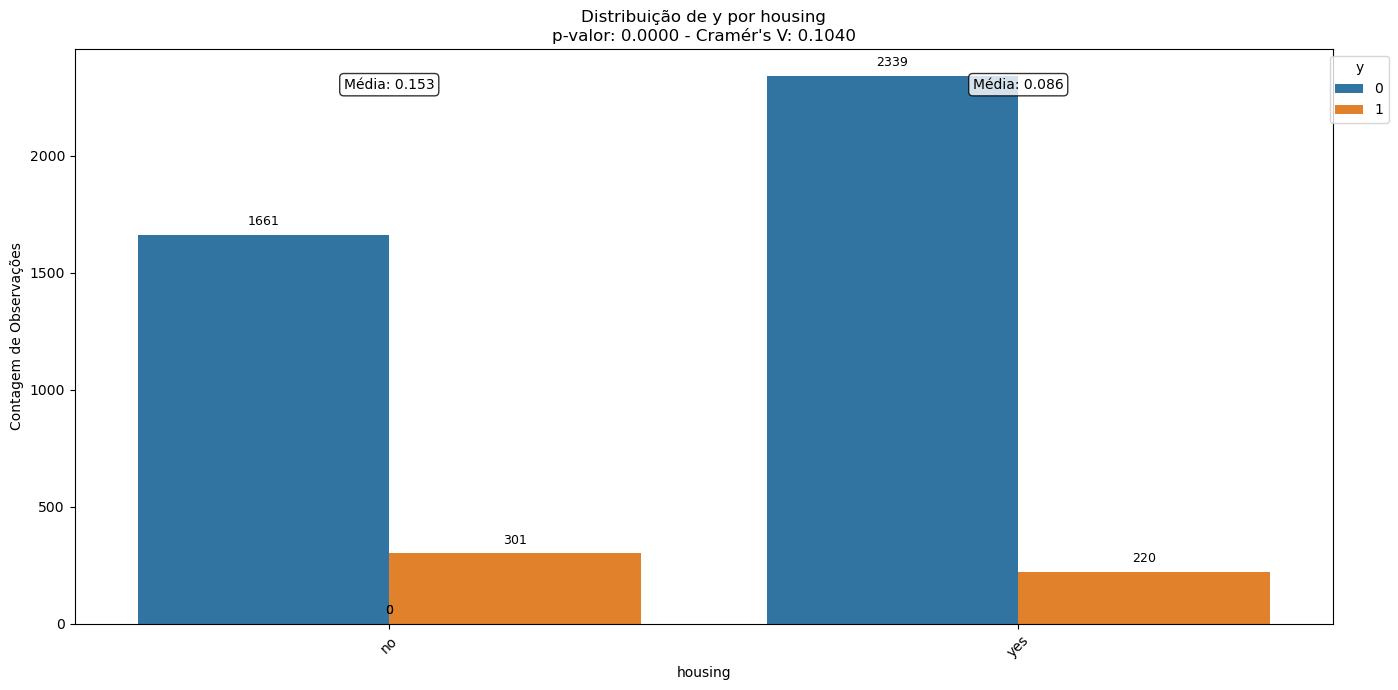

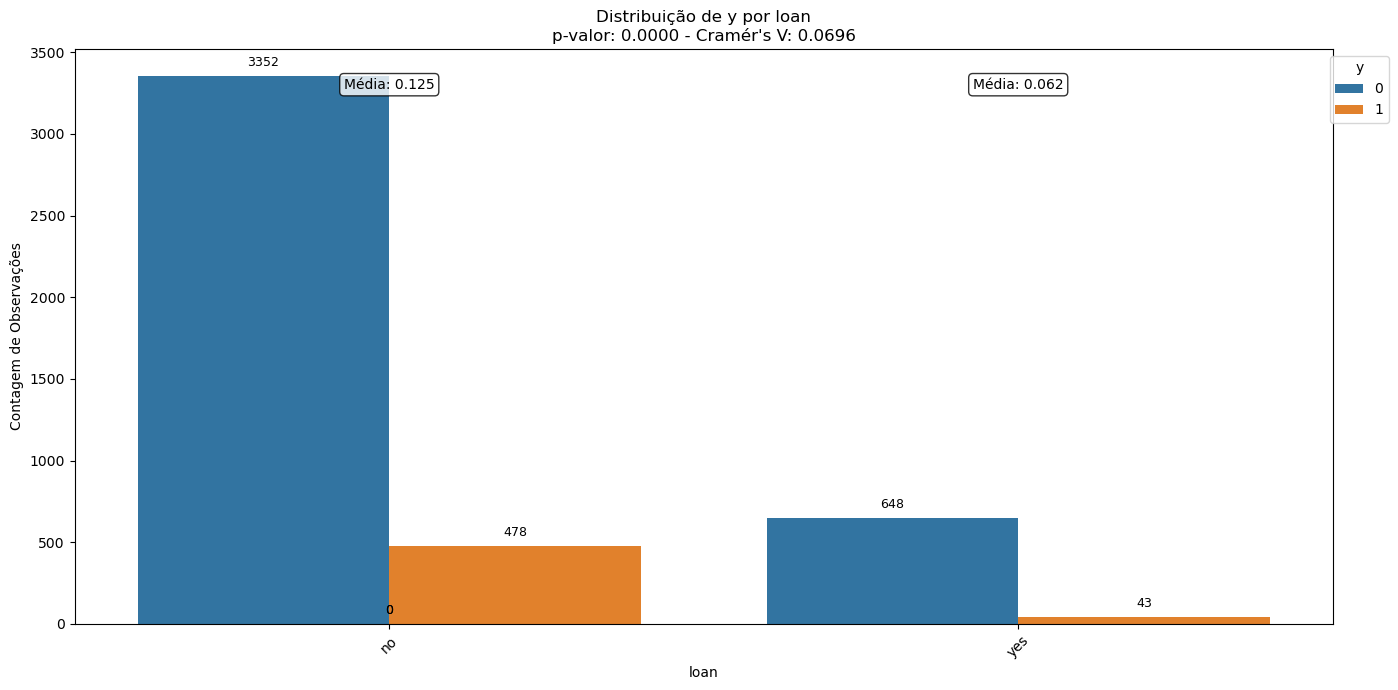

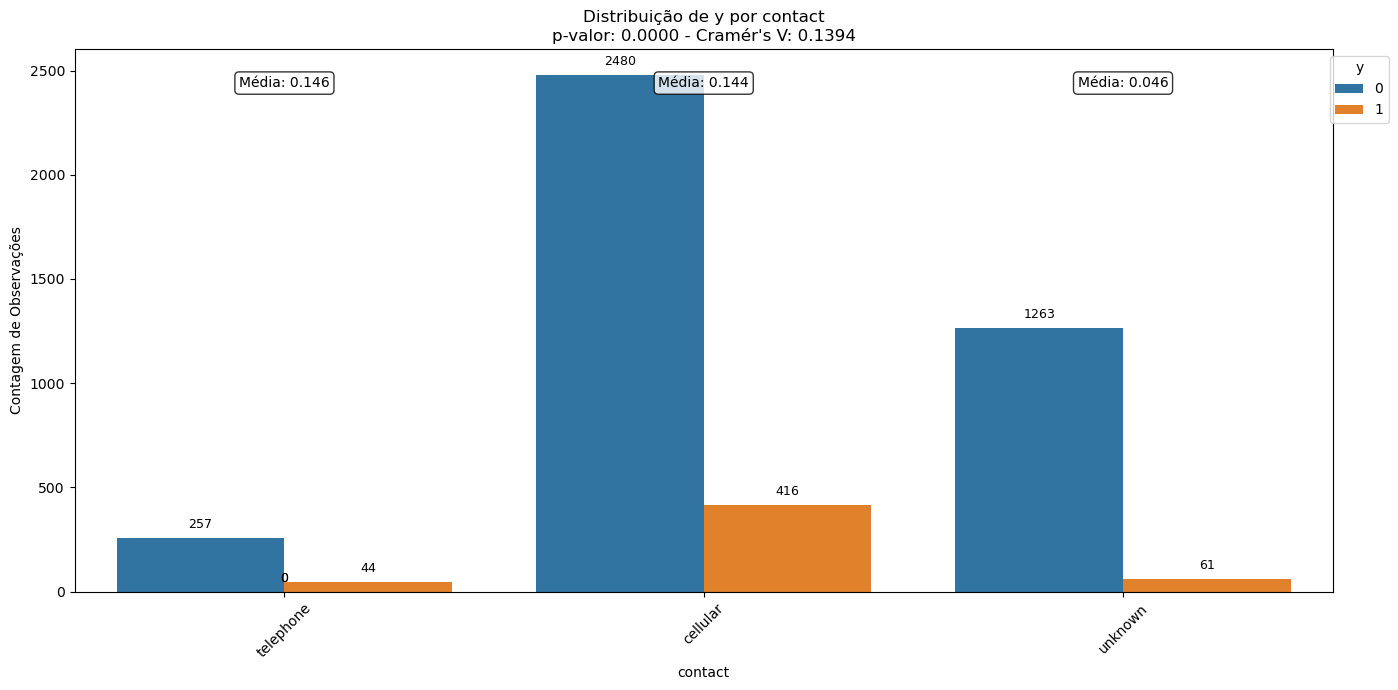

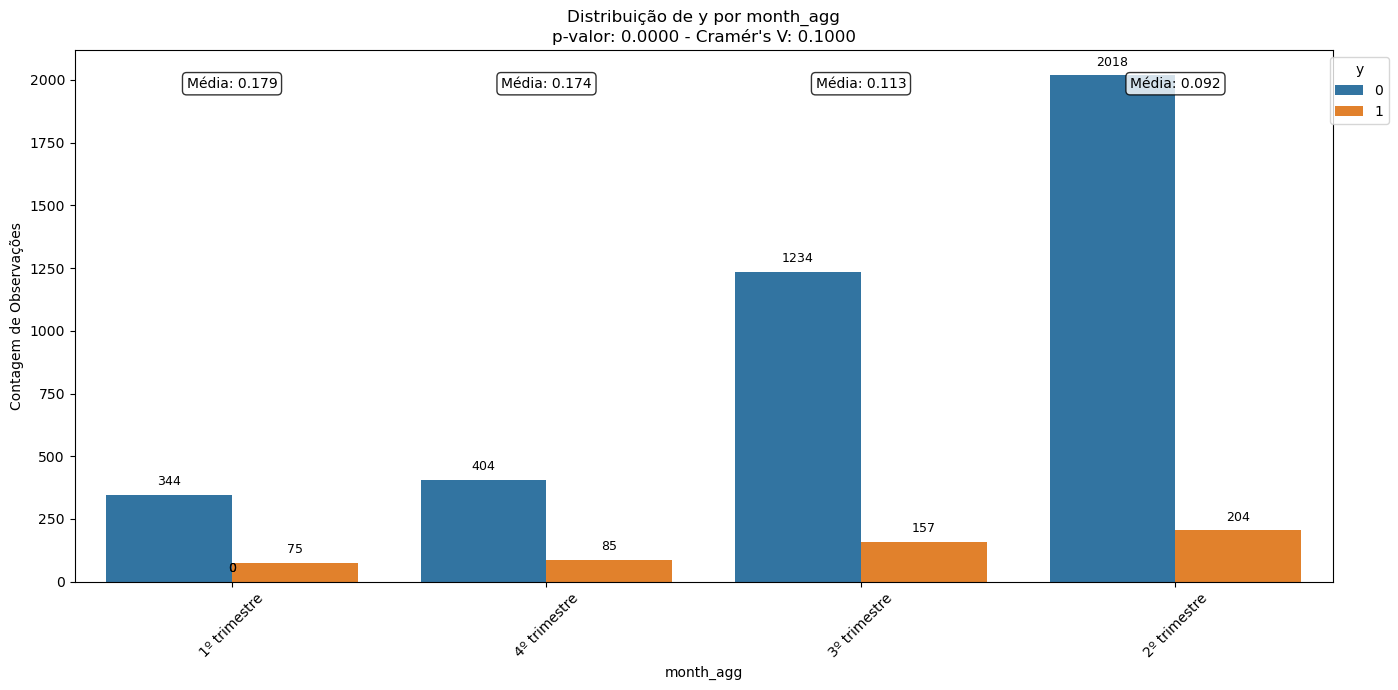

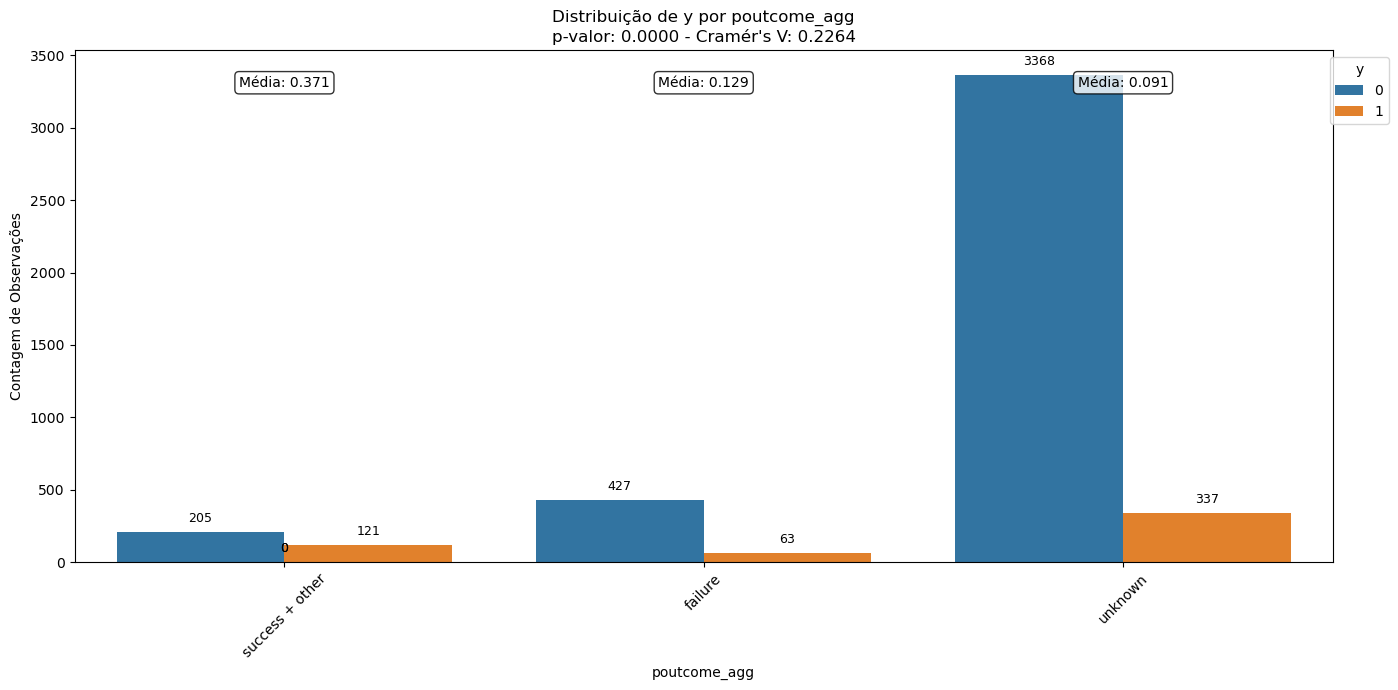

         Variável       p-valor  Cramér_V
12   poutcome_agg  4.867754e-51  0.226383
3       pdays_cat  3.896098e-29  0.170113
4    previous_cat  4.950787e-27  0.163692
10        contact  8.304301e-20  0.139413
5         job_agg  2.544929e-13  0.122732
8         housing  2.714700e-12  0.103985
0         age_cat  2.946769e-11  0.103570
11      month_agg  8.362875e-10  0.099996
9            loan  2.914829e-06  0.069554
6     marital_agg  1.719305e-05  0.063930
7   education_agg  5.100841e-04  0.057911
2    campaign_cat  1.607768e-03  0.046915
1         day_cat  6.398695e-03  0.052177


In [23]:
# Conferindo relação entre novas variáveis categóricas e o target 'y'
resultados_agg = funcoes_importantes.analise_categorias_vs_target(df_analise, target='y', graficos=True)
print(resultados_agg)

### <center>Criando as dummies das variáveis categóricas

In [24]:
# Listando as variáveis do df_analise
df_analise.columns.tolist()

['age_cat',
 'balance',
 'day_cat',
 'duration',
 'campaign_cat',
 'pdays_cat',
 'previous_cat',
 'job_agg',
 'marital_agg',
 'education_agg',
 'housing',
 'loan',
 'contact',
 'month_agg',
 'poutcome_agg',
 'y']

In [25]:
# Definindo colunas que serão transformadas em dummies
dummy_cols = ['age_cat', 'day_cat', 'campaign_cat', 'pdays_cat', 'previous_cat', 'job_agg', 'marital_agg', 'education_agg', 'housing', 
              'loan', 'contact', 'month_agg', 'poutcome_agg']

# Criando as variáveis dummies para as variáveis categóricas
dummies = pd.get_dummies(df_analise[dummy_cols], drop_first=True)

# Adicionando "dummy" ao final de cada nome de coluna
dummies.columns = [f"{col}_dummy" for col in dummies.columns]

# Concatenando as variáveis dummy com o DataFrame original
df_analise = pd.concat([df_analise, dummies], axis=1)

# Transformando variáveis dummies em int
df_analise.loc[:, df_analise.columns.str.endswith('_dummy')] = df_analise.loc[:, df_analise.columns.str.endswith('_dummy')].astype(int)

df_analise.head()

C:\Users\laris\AppData\Local\Temp\ipykernel_64380\2066482701.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_analise.loc[:, df_analise.columns.str.endswith('_dummy')] = df_analise.loc[:, df_analise.columns.str.endswith('_dummy')].astype(int)
C:\Users\laris\AppData\Local\Temp\ipykernel_64380\2066482701.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_analise.loc[:, df_analise.columns.str.endswith('_dummy')] = df_analise.loc[:, df_analise.columns.str.endswith('_dummy')].astype(int)
C:\Users\laris\AppData\Local\Temp\ipykernel_64380\2066482701.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

,age_cat,balance,day_cat,duration,campaign_cat,pdays_cat,previous_cat,job_agg,marital_agg,education_agg,...,education_agg_unknown + primary_dummy,housing_yes_dummy,loan_yes_dummy,contact_telephone_dummy,contact_unknown_dummy,month_agg_2º trimestre_dummy,month_agg_3º trimestre_dummy,month_agg_4º trimestre_dummy,poutcome_agg_success + other_dummy,poutcome_agg_unknown_dummy
0,30 a 57,1787,17 a 21,79,1 a 2,Não contatado,0,self-employed + technician + unemployed,married,unknown + primary,...,1,0,0,0,0,0,0,1,0,1
1,30 a 57,4789,10 a 16,220,1 a 2,Mais de 180 dias,Mais de 2,entrepreneur + services,married,secondary,...,0,1,1,0,0,1,0,0,0,0
2,30 a 57,1350,10 a 16,185,1 a 2,Mais de 180 dias,1 a 2,management,single + divorced,tertiary,...,0,1,0,0,0,1,0,0,0,0
3,30 a 57,1476,1 a 9,199,mais de 2,Não contatado,0,management,married,tertiary,...,0,1,1,0,1,1,0,0,0,1
4,Acima de 57,0,1 a 9,226,1 a 2,Não contatado,0,blue-collar,married,secondary,...,0,1,0,0,1,1,0,0,0,1


In [26]:
# Removendo as colunas originais que foram transformadas em dummies
df_analise.drop(columns=dummy_cols, inplace=True)
# Verificando o DataFrame final
df_analise.head()

,balance,duration,y,age_cat_30 a 57_dummy,age_cat_Acima de 57_dummy,day_cat_10 a 16_dummy,day_cat_17 a 21_dummy,day_cat_22 a 31_dummy,campaign_cat_mais de 2_dummy,pdays_cat_Menos de 180 dias_dummy,...,education_agg_unknown + primary_dummy,housing_yes_dummy,loan_yes_dummy,contact_telephone_dummy,contact_unknown_dummy,month_agg_2º trimestre_dummy,month_agg_3º trimestre_dummy,month_agg_4º trimestre_dummy,poutcome_agg_success + other_dummy,poutcome_agg_unknown_dummy
0,1787,79,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,4789,220,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2,1350,185,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1476,199,0,1,0,0,0,0,1,0,...,0,1,1,0,1,1,0,0,0,1
4,0,226,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


# <center>CONSTRUINDO O MODELO

In [27]:
# Definindo a matriz de variáveis independentes (X) e a variável dependente (y)
X = df_analise.drop(columns=['y'])
y = df_analise['y']
X.head()

,balance,duration,age_cat_30 a 57_dummy,age_cat_Acima de 57_dummy,day_cat_10 a 16_dummy,day_cat_17 a 21_dummy,day_cat_22 a 31_dummy,campaign_cat_mais de 2_dummy,pdays_cat_Menos de 180 dias_dummy,pdays_cat_Mais de 180 dias_dummy,...,education_agg_unknown + primary_dummy,housing_yes_dummy,loan_yes_dummy,contact_telephone_dummy,contact_unknown_dummy,month_agg_2º trimestre_dummy,month_agg_3º trimestre_dummy,month_agg_4º trimestre_dummy,poutcome_agg_success + other_dummy,poutcome_agg_unknown_dummy
0,1787,79,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,4789,220,1,0,1,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0
2,1350,185,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,1476,199,1,0,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,1
4,0,226,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


### <center>Modelo sem seleção de variáveis

In [28]:
# Criando o modelo de regressão logística
X_modelo_total = sm.add_constant(X)  # Adicionando a constante ao modelo
modelo_total = sm.GLM(y, X_modelo_total, family=sm.families.Binomial()).fit()  # Ajustando o modelo de regressão logística
# Exibindo o resumo do modelo
print(modelo_total.summary())
pred_modelo_total = modelo_total.predict(X_modelo_total)  # Fazendo previsões com o modelo ajustado

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4493
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.4
Date:                Fri, 20 Jun 2025   Deviance:                       2318.8
Time:                        15:41:23   Pearson chi2:                 1.40e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1827
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [29]:
# Calculando a exponencial dos coeficientes do modelo
exp_coef_total = np.exp(modelo_total.params)
# Exibindo os coeficientes exponenciais do modelo
exp_coef_total

const                                                    0.128839
balance                                                  1.000000
duration                                                 1.004037
age_cat_30 a 57_dummy                                    0.800882
age_cat_Acima de 57_dummy                                1.108567
day_cat_10 a 16_dummy                                    1.222205
day_cat_17 a 21_dummy                                    0.783481
day_cat_22 a 31_dummy                                    1.156446
campaign_cat_mais de 2_dummy                             0.809698
pdays_cat_Menos de 180 dias_dummy                        0.704296
pdays_cat_Mais de 180 dias_dummy                         0.557789
previous_cat_1 a 2_dummy                                 0.621079
previous_cat_Mais de 2_dummy                             0.632526
job_agg_entrepreneur + services_dummy                    1.149330
job_agg_housemaid + admin_dummy                          1.489288
job_agg_ma

### <center>Aplicando seleção de variáveis

#### <center>Stepwise AIC: modelo_step_aic

In [30]:
# Fazendo a seleção de variáveis para o modelo
colunas_selecionadas_aic = funcoes_importantes.step(var_dependente='y',
                            var_independente=X.columns.tolist(),
                            base=df_analise,
                            metodo='both',
                            metrica='aic')

X_modelo_step_aic = df_analise[colunas_selecionadas_aic['var'].to_list()[0]]  # Selecionando as colunas do DataFrame com base nas variáveis selecionadas
X_modelo_step_aic.head()

,pdays_cat_Menos de 180 dias_dummy,duration,poutcome_agg_success + other_dummy,contact_unknown_dummy,housing_yes_dummy,loan_yes_dummy,job_agg_student + retired + unknown_dummy,education_agg_tertiary_dummy,month_agg_3º trimestre_dummy,day_cat_17 a 21_dummy,marital_agg_single + divorced_dummy,age_cat_30 a 57_dummy,campaign_cat_mais de 2_dummy,job_agg_housemaid + admin_dummy
0,0,79,0,0,0,0,0,0,0,1,0,1,0,0
1,0,220,0,0,1,1,0,0,0,0,0,1,0,0
2,0,185,0,0,1,0,0,1,0,0,1,1,0,0
3,0,199,0,1,1,1,0,1,0,0,0,1,1,0
4,0,226,0,1,1,0,0,0,0,0,0,0,0,0


In [31]:
# Criando o modelo de regressão logística
X_modelo_step_aic = sm.add_constant(X_modelo_step_aic)  # Adicionando a constante ao modelo
modelo_step_aic = sm.GLM(y, X_modelo_step_aic, family=sm.families.Binomial()).fit()  # Ajustando o modelo de regressão logística
# Exibindo o resumo do modelo
print(modelo_step_aic.summary())
pred_modelo_step_aic = modelo_step_aic.predict(X_modelo_step_aic)  # Fazendo previsões com o modelo ajustado

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4506
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.1
Date:                Fri, 20 Jun 2025   Deviance:                       2326.1
Time:                        15:41:32   Pearson chi2:                 1.37e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1814
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [32]:
# Calculando a exponencial dos coeficientes do modelo
exp_coef_step_aic = np.exp(modelo_step_aic.params)
# Exibindo os coeficientes exponenciais do modelo
exp_coef_step_aic

const                                        0.052170
pdays_cat_Menos de 180 dias_dummy            1.312165
duration                                     1.004034
poutcome_agg_success + other_dummy           4.025902
contact_unknown_dummy                        0.287881
housing_yes_dummy                            0.565798
loan_yes_dummy                               0.490267
job_agg_student + retired + unknown_dummy    1.947069
education_agg_tertiary_dummy                 1.546937
month_agg_3º trimestre_dummy                 0.726567
day_cat_17 a 21_dummy                        0.738398
marital_agg_single + divorced_dummy          1.244300
age_cat_30 a 57_dummy                        0.770561
campaign_cat_mais de 2_dummy                 0.811437
job_agg_housemaid + admin_dummy              1.309823
dtype: float64

#### <center>Stepwise p-valor: modelo_step_pvalor

In [33]:
# Fazendo a seleção de variáveis para o modelo
colunas_selecionadas_pvalor = funcoes_importantes.stepwise(var_dependente='y',
                            var_independente=X.columns.tolist(),
                            base=df_analise,
                            metrica='pvalor'
                            )

X_modelo_step_pvalor = df_analise[colunas_selecionadas_pvalor['var'].to_list()]  # Selecionando as colunas do DataFrame com base nas variáveis selecionadas
X_modelo_step_pvalor.head()

c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalor = modelo.pvalues[1]
c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logística\Lição de Casa_ A tecnologia a seu favor\15_Lista_7\funcoes_importantes.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalor = modelo.pvalues[1]
c:\Users\laris\OneDrive\Documentos\.LARISSA\Carreira e estudos\Estudos\Data\ASN IDA\13 - Regressão Logís

,duration,poutcome_agg_success + other_dummy,contact_unknown_dummy,housing_yes_dummy,job_agg_student + retired + unknown_dummy,loan_yes_dummy,education_agg_tertiary_dummy,month_agg_3º trimestre_dummy,day_cat_17 a 21_dummy,marital_agg_single + divorced_dummy
0,79,0,0,0,0,0,0,0,1,0
1,220,0,0,1,0,1,0,0,0,0
2,185,0,0,1,0,0,1,0,0,1
3,199,0,1,1,0,1,1,0,0,0
4,226,0,1,1,0,0,0,0,0,0


In [34]:
# Criando o modelo de regressão logística
X_modelo_step_pvalor = sm.add_constant(X_modelo_step_pvalor)  # Adicionando a constante ao modelo
modelo_step_pvalor = sm.GLM(y, X_modelo_step_pvalor, family=sm.families.Binomial()).fit()  # Ajustando o modelo de regressão logística
# Exibindo o resumo do modelo
print(modelo_step_pvalor.summary())
pred_modelo_step_pvalor = modelo_step_pvalor.predict(X_modelo_step_pvalor)  # Fazendo previsões com o modelo ajustado

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4521
Model:                            GLM   Df Residuals:                     4510
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1168.8
Date:                Fri, 20 Jun 2025   Deviance:                       2337.7
Time:                        15:41:38   Pearson chi2:                 1.19e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1793
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [35]:
# Calculando a exponencial dos coeficientes do modelo
exp_coef_step_pvalor = np.exp(modelo_step_pvalor.params)
# Exibindo os coeficientes exponenciais do modelo
print(exp_coef_step_pvalor)

const                                        0.044389
duration                                     1.004018
poutcome_agg_success + other_dummy           4.624007
contact_unknown_dummy                        0.277162
housing_yes_dummy                            0.539670
job_agg_student + retired + unknown_dummy    2.137267
loan_yes_dummy                               0.484836
education_agg_tertiary_dummy                 1.480946
month_agg_3º trimestre_dummy                 0.671768
day_cat_17 a 21_dummy                        0.727404
marital_agg_single + divorced_dummy          1.283361
dtype: float64


# <center>VALIDANDO O MODELO

In [36]:
# Criado uma nova base de dados com as previsões do modelo
df_metricas = df_analise.copy()

# Adicionando as previsões do modelo à base de dados
df_metricas['y_chapeu_aic'] = pred_modelo_step_aic
df_metricas['y_chapeu_pvalor'] = pred_modelo_step_pvalor

# Selecionando as colunas de interesse para análise de métricas
df_metricas = df_metricas[['y', 'y_chapeu_aic', 'y_chapeu_pvalor']]
df_metricas.head()

,y,y_chapeu_aic,y_chapeu_pvalor
0,0,0.039199,0.042444
1,0,0.026326,0.027299
2,0,0.084419,0.087267
3,0,0.008898,0.010478
4,0,0.020671,0.016169


In [37]:
# Criando a regra de decisão para classificar as previsões
df_metricas['decisao_02_aic'] = np.where(df_metricas['y_chapeu_aic'].copy() >= 0.2, 1, 0)  # Classificação com threshold de 0.2
df_metricas['decisao_05_aic'] = np.where(df_metricas['y_chapeu_aic'].copy() >= 0.5, 1, 0)  # Classificação com threshold de 0.5
df_metricas['decisao_08_aic'] = np.where(df_metricas['y_chapeu_aic'].copy() >= 0.8, 1, 0)  # Classificação com threshold de 0.8
df_metricas['decisao_02_pvalor'] = np.where(df_metricas['y_chapeu_pvalor'].copy() >= 0.2, 1, 0)  # Classificação com threshold de 0.2
df_metricas['decisao_05_pvalor'] = np.where(df_metricas['y_chapeu_pvalor'].copy() >= 0.5, 1, 0)  # Classificação com threshold de 0.5
df_metricas['decisao_08_pvalor'] = np.where(df_metricas['y_chapeu_pvalor'].copy() >= 0.8, 1, 0)  # Classificação com threshold de 0.8

# Visualizando as primeiras linhas do DataFrame com as decisões
df_metricas.head()

,y,y_chapeu_aic,y_chapeu_pvalor,decisao_02_aic,decisao_05_aic,decisao_08_aic,decisao_02_pvalor,decisao_05_pvalor,decisao_08_pvalor
0,0,0.039199,0.042444,0,0,0,0,0,0
1,0,0.026326,0.027299,0,0,0,0,0,0
2,0,0.084419,0.087267,0,0,0,0,0,0
3,0,0.008898,0.010478,0,0,0,0,0,0
4,0,0.020671,0.016169,0,0,0,0,0,0


### <center>Medida de Estimação

In [38]:
# Calculando o RMSE
rmse_step_aic = np.sqrt(mean_squared_error(df_metricas['y'], df_metricas['y_chapeu_aic']))
rmse_step_pvalor = np.sqrt(mean_squared_error(df_metricas['y'], df_metricas['y_chapeu_pvalor']))
print(f"RMSE do modelo step_aic: {rmse_step_aic:.4f}")
print(f"RMSE do modelo step_pvalor: {rmse_step_pvalor:.4f}")

RMSE do modelo step_aic: 0.2775
RMSE do modelo step_pvalor: 0.2778


### <center>Medidas de Decisão

In [39]:


# Calulando as métricas de avaliação do modelo para o threshold de 0.2
accuracy_02_aic, precision_02_aic, recall_02_aic, f1_score_02_aic = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_02_aic'])

# Calculando as métricas de avaliação do modelo para o threshold de 0.5
accuracy_05_aic, precision_05_aic, recall_05_aic, f1_score_05_aic = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_05_aic'])

# Calculando as métricas de avaliação do modelo para o threshold de 0.8
accuracy_08_aic, precision_08_aic, recall_08_aic, f1_score_08_aic = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_08_aic'])

# Calculando as métricas de avaliação do modelo para o threshold de 0.2
accuracy_02_pvalor, precision_02_pvalor, recall_02_pvalor, f1_score_02_pvalor = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_02_pvalor'])
# Calculando as métricas de avaliação do modelo para o threshold de 0.5
accuracy_05_pvalor, precision_05_pvalor, recall_05_pvalor, f1_score_05_pvalor = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_05_pvalor'])
# Calculando as métricas de avaliação do modelo para o threshold de 0.8
accuracy_08_pvalor, precision_08_pvalor, recall_08_pvalor, f1_score_08_pvalor = funcoes_importantes.calcular_metricas(df_metricas['y'], df_metricas['decisao_08_pvalor'])

# Exibindo as métricas de avaliação do modelo para os modelos e diferentes thresholds em formato de tabela
metricas = pd.DataFrame({
    'Métrica': ['RMSE', 'Acurácia', 'Precisão', 'Recall', 'F1-Score'],
    'Modelo Step AIC (0.2)': [rmse_step_aic, accuracy_02_aic, precision_02_aic, recall_02_aic, f1_score_02_aic],
    'Modelo Step AIC (0.5)': [rmse_step_aic, accuracy_05_aic, precision_05_aic, recall_05_aic, f1_score_05_aic],
    'Modelo Step AIC (0.8)': [rmse_step_aic, accuracy_08_aic, precision_08_aic, recall_08_aic, f1_score_08_aic],
    'Modelo Step P-Valor (0.2)': [rmse_step_pvalor, accuracy_02_pvalor, precision_02_pvalor, recall_02_pvalor, f1_score_02_pvalor],
    'Modelo Step P-Valor (0.5)': [rmse_step_pvalor, accuracy_05_pvalor, precision_05_pvalor, recall_05_pvalor, f1_score_05_pvalor],
    'Modelo Step P-Valor (0.8)': [rmse_step_pvalor, accuracy_08_pvalor, precision_08_pvalor, recall_08_pvalor, f1_score_08_pvalor]
})
metricas

,Métrica,Modelo Step AIC (0.2),Modelo Step AIC (0.5),Modelo Step AIC (0.8),Modelo Step P-Valor (0.2),Modelo Step P-Valor (0.5),Modelo Step P-Valor (0.8)
0,RMSE,0.277483,0.277483,0.277483,0.277809,0.277809,0.277809
1,Acurácia,0.874364,0.893608,0.889184,0.873037,0.894050,0.888078
2,Precisão,0.466476,0.591743,0.647059,0.462411,0.596330,0.615385
3,Recall,0.627639,0.247601,0.084453,0.625720,0.249520,0.076775
4,F1-Score,0.535188,0.349120,0.149406,0.531811,0.351827,0.136519


### <center>Medidas de Ordenação

In [40]:
# Calculando o lift flexível para os modelos com diferentes thresholds e percentis
resultados_completos = funcoes_importantes.calcular_lift_flexivel(
    df=df_metricas,
    y_true_col='y',
    list_y_pred_col=['y_chapeu_aic', 'y_chapeu_pvalor'],
    list_percentis=[10, 20, 30, 50]
)

# Visualizar resultados
resultados_completos

,Modelo,Tipo_Corte,Valor_Corte,Tamanho_Grupo,Taxa_Resposta_Grupo,Lift
0,y_chapeu_aic,Percentil,10,452,0.548673,4.761130
1,y_chapeu_aic,Percentil,20,904,0.410398,3.561248
2,y_chapeu_aic,Percentil,30,1356,0.320796,2.783725
3,y_chapeu_aic,Percentil,50,2260,0.216814,1.881414
4,y_chapeu_pvalor,Percentil,10,452,0.544248,4.722734
5,y_chapeu_pvalor,Percentil,20,904,0.402655,3.494055
6,y_chapeu_pvalor,Percentil,30,1356,0.318584,2.764527
7,y_chapeu_pvalor,Percentil,50,2260,0.216814,1.881414


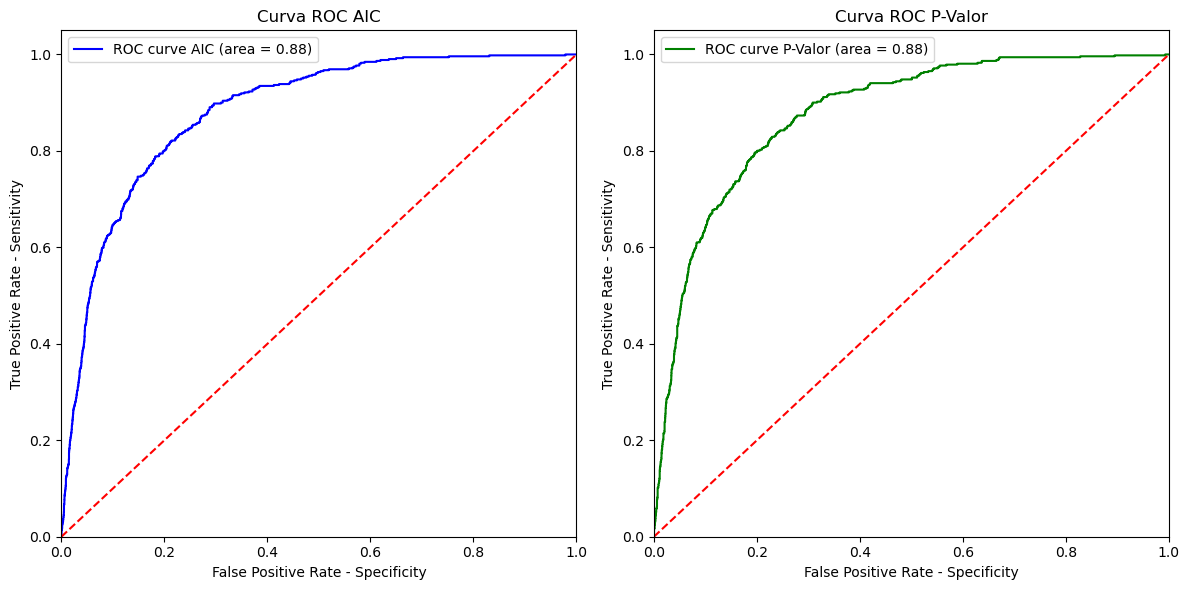

In [41]:
# Curva ROC para o modelo com AIC
fpr_aic, tpr_aic, _ = roc_curve(df_metricas['y'], df_metricas['y_chapeu_aic'])
roc_auc_aic = auc(fpr_aic, tpr_aic)
# Curva ROC para o modelo com p-valor
fpr_pvalor, tpr_pvalor, _ = roc_curve(df_metricas['y'], df_metricas['y_chapeu_pvalor'])
roc_auc_pvalor = auc(fpr_pvalor, tpr_pvalor)

# Plotando a Curva ROC para cada modelo lado a lado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_aic, tpr_aic, color='blue', label=f'ROC curve AIC (area = {roc_auc_aic:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('Curva ROC AIC')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(fpr_pvalor, tpr_pvalor, color='green', label=f'ROC curve P-Valor (area = {roc_auc_pvalor:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('Curva ROC P-Valor')
plt.legend()
plt.tight_layout()
plt.show()


# <center>CONCLUSÕES

**Escolha do modelo:**
Foram criados dois modelos. Um com seleção de variáveis utilizando técnias stepwise com base no AIC, outro com base no p-valor. Ambos apresentaram resultados muito semelhantes. 
Sendo assim, vamos analisar o modelo baseado no AIC, supondo que aplicaremos este modelo para previsão de futuras subscrições.

**Análise dos exponenciais dos coeficientes (Odds Ratio):**
| Variável                                  | Odds Ratio | Interpretação                                                                 |
|-------------------------------------------|------------|-------------------------------------------------------------------------------|
| **const**                                 | 0.052      | Chance basal (sem variáveis explicativas) é 5.2% (baixa probabilidade intrínseca do evento). |
| **pdays_cat_Menos de 180 dias_dummy**     | 1.312      | Clientes contatados há <180 dias têm **31% mais chances** de conversão vs. outros. |
| **duration**                              | 1.004      | Cada minuto adicional de duração do contato aumenta a chance em **0.4%**. |
| **poutcome_agg_success + other_dummy**    | 4.026      | Clientes com campanhas anteriores **bem-sucedidas** têm **4x mais chances** de conversão. |
| **contact_unknown_dummy**                 | 0.288      | Contato por canal **desconhecido** reduz a chance em **71%** (vs. canais conhecidos). |
| **housing_yes_dummy**                     | 0.566      | Ter **empréstimo imobiliário** reduz a chance em **43%**. |
| **loan_yes_dummy**                        | 0.490      | Ter **empréstimo pessoal** reduz a chance em **51%**. |
| **job_agg_student + retired + unknown**   | 1.947      | **Estudantes/aposentados** têm **95% mais chances** vs. outras profissões. |
| **education_agg_tertiary_dummy**          | 1.547      | Educação **superior** aumenta a chance em **55%**. |
| **month_agg_3º trimestre_dummy**          | 0.727      | Campanhas no **3º trimestre** têm **27% menos chances** vs. outros períodos. |
| **day_cat_17 a 21_dummy**                 | 0.738      | Contatos entre **dias 17-21** do mês têm **26% menos chances** de sucesso. |
| **marital_agg_single + divorced_dummy**   | 1.244      | **Solteiros/divorciados** têm **24% mais chances** vs. casados. |
| **age_cat_30 a 57_dummy**                 | 0.771      | Pessoas entre **30-57 anos** têm **23% menos chances** vs. outras faixas etárias. |
| **campaign_cat_mais de 2_dummy**          | 0.811      | Clientes com **mais de 2 campanhas** prévias têm **19% menos chances**. |
| **job_agg_housemaid + admin_dummy**       | 1.310      | **Dono de casa/administrativos** têm **31% mais chances**. |


**Principais Insights**

- Fatores que Aumentam a Conversão
    - Sucesso em campanhas anteriores (4x mais chances)
    - Estudantes/aposentados (quase 2x mais chances)
    - Educação superior (+55%)
    - Contato recente (<180 dias: +31%)

- Fatores que Reduzem a Conversão
    - Empréstimos (pessoal: -51%; imobiliário: -43%)
    - Canal de contato desconhecido (-71%)
    - 3º trimestre (-27%) e idade 30-57 anos (-23%)

- Fatores Neutros/Moderados
    - Estado civil (solteiros/divorciados: +24%)
    - Dia do mês (dias 17-21: -26%)

**Recomendações de Ação**

- Priorizar clientes com:
    - Campanhas anteriores bem-sucedidas.
    - Perfil de estudante/aposentado + educação superior.
    - Evitar contatos por canais desconhecidos e clientes com empréstimos.
    - Ajustar timing de campanhas (evitar 3º trimestre e dias 17-21).

**Medidas de Decisão**
Ao avaliar melhor corte para decisão no modelo, observa-se que o corte em 0,2 apresenta o melhor equilíbrio entre precisão e recall, em comparação com os cortes em 0,5 e 0,8, com f1-score de 0,5.
Sendo assim, ao considerar que quando a probabilidade de subscrição é maior que 0,2, vamos agir sobre o indivíduo, tem-se:
- Precisão de 0,46, o que indica que dentre todos os indivíduos que entraremos em contato para tentar subscrição, 46% vão subscrever. 
- Recall de 0,62, o que indica que dentre todos os indivíduos que poderiam se subscrever, o modelo está captando 62% deles.


**Medidas de Ordenação**
Se tivermos limitações de número de indivíduos sobre os quais podemos agir, é necessário analisar medidas como o lift.
Considerando que só temos recursos para agir em 10% da nossa base de dados, o lift seria de 4,76, ou seja, o modelo apresentaria um resultado 376% melhor do que se a ação fosse realizada aleatoriamente. 

O AUC de 0,88 indica que o modelo está performando muito bem em separar os indivíduos que vão subscrever dos que não vão, mais especificamente, 76% melhor do que a aleatoriedade.